# Housing Price Prediction - Advanced Regression Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Goal
The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house
Also determine the optimal value of lambda for ridge and lasso regression.

## 1. Import the data and Understanting

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

In [3]:
# Loading CSV file and reading into dataframe
df = pd.read_csv("C:/Users/Success/Desktop/Jayanth/workspace/HousingPricePrediction_Assignment/train.csv", na_values="NAN")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Cleaning the data

In [7]:
# Checking data type of all columns

# Converting following columns to object type because they are categorical
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

# Convering following columns to numerical type
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [8]:
# Seggregating numerical and categorical variables
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

In [9]:
# Checking for missing/NaN values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df.isna().sum().sum()

6965

In [11]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Missing Value Treatment

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Dropping Columns with most 'NaN' values
df.dropna(thresh = int(0.6*len(df)), axis=1, inplace=True)

In [14]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [15]:
# Treating missing values in numerical columns
for col in df.columns :
    if col in df_numerical.columns :
        df[col].fillna(df[col].mean(), inplace=True)

In [16]:
# Treating missing values in categorical columns
for col in df.columns :
    if col in df_categorical.columns :
        df[col].fillna('None', inplace=True)

In [17]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [18]:
df.isna().sum().sum()

0

In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## 3. EDA

In [20]:
!pip install sweetviz

In [21]:
# Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(df, pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

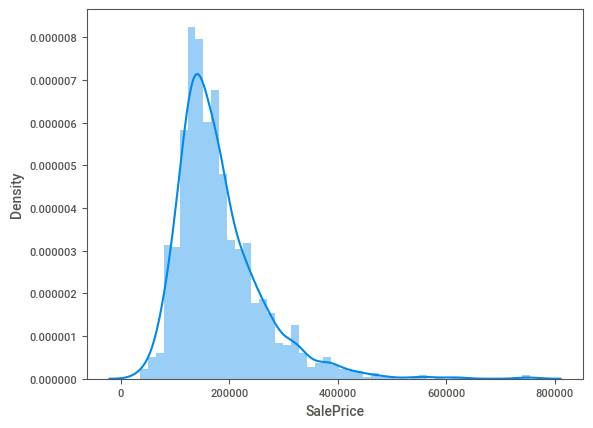

In [22]:
# Univariate Analysis on the target variable : 'SalesPrice'
sns.distplot(df['SalePrice'])

##### Observation:

From the above plot we can observe that it right skewed. So to confirm the same we can use some of the metrics

In [23]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


##### We can see here from the above metrics that the target variable has high skew value and a kurt value that are greater than 1. This indicates that the target variable is highly skewed and highly peaked

##### We will perform a log transformation on the target variable

#### Data Transformation:

In [24]:
# Performing log transformation on the target variable : 'SalePrice'
df['SalePrice'] = np.log(df['SalePrice'])

In [25]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

0.12133506220520406
0.8095319958036296


##### Observation:

After the log transformation the skewness and kurt value are below 1

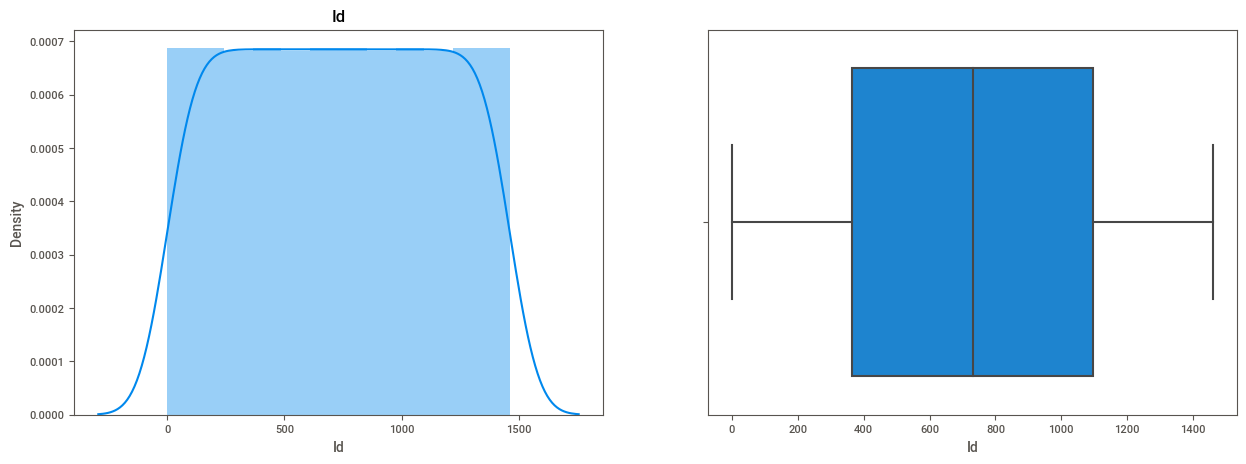

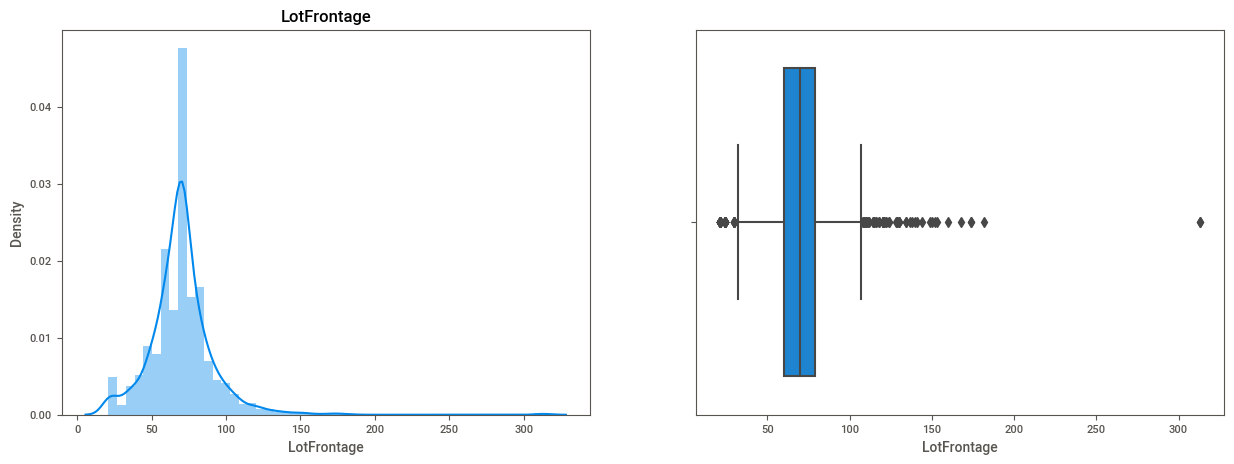

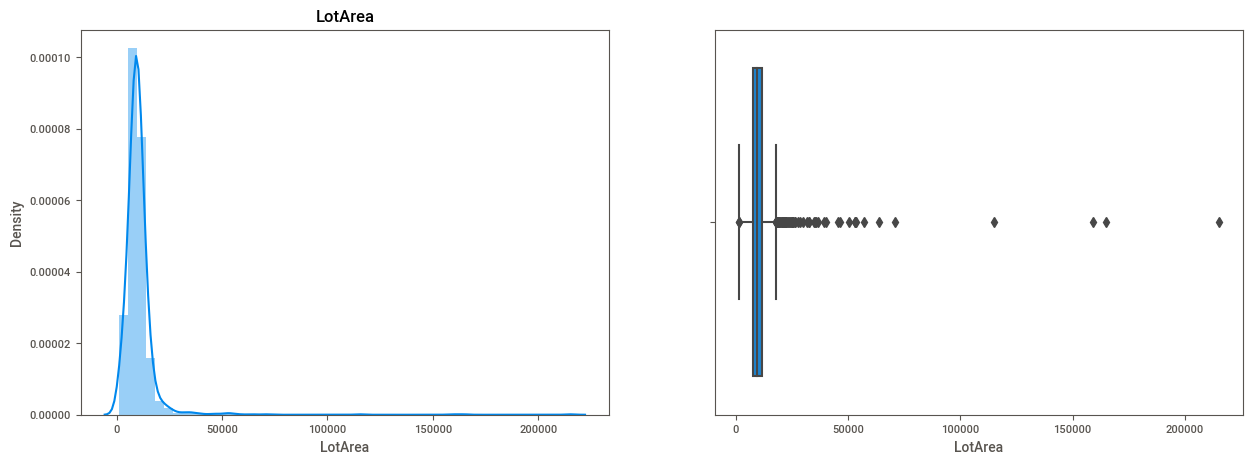

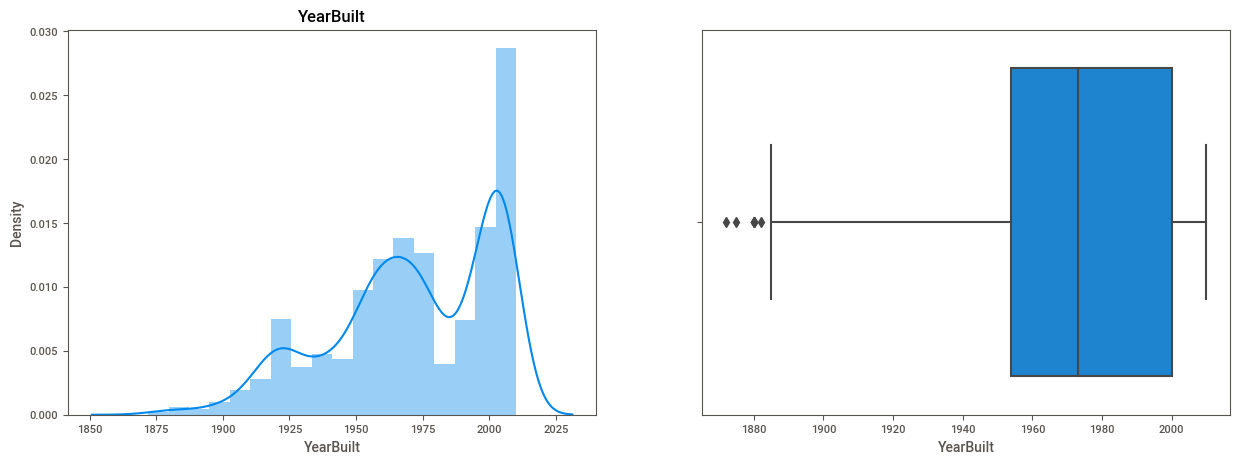

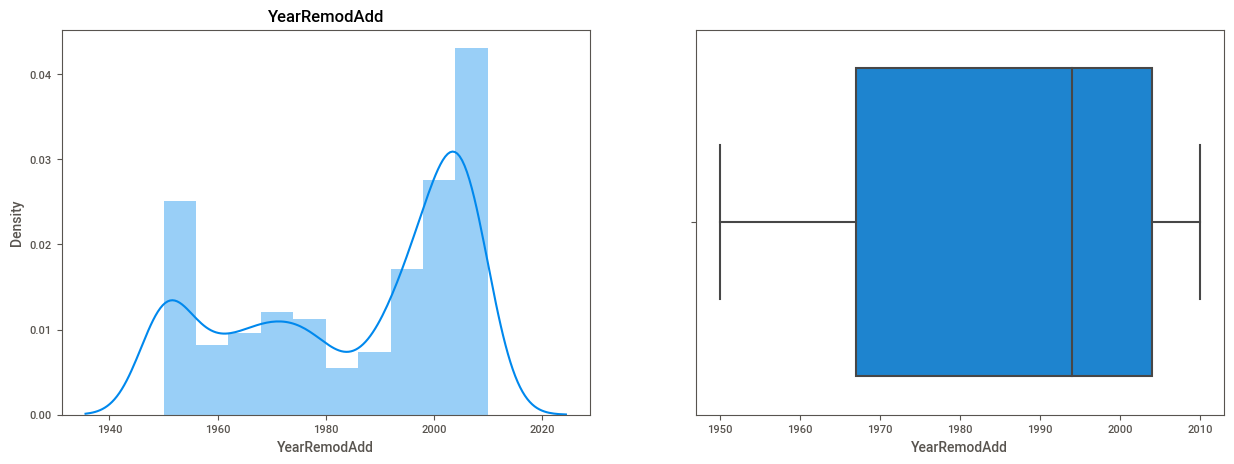

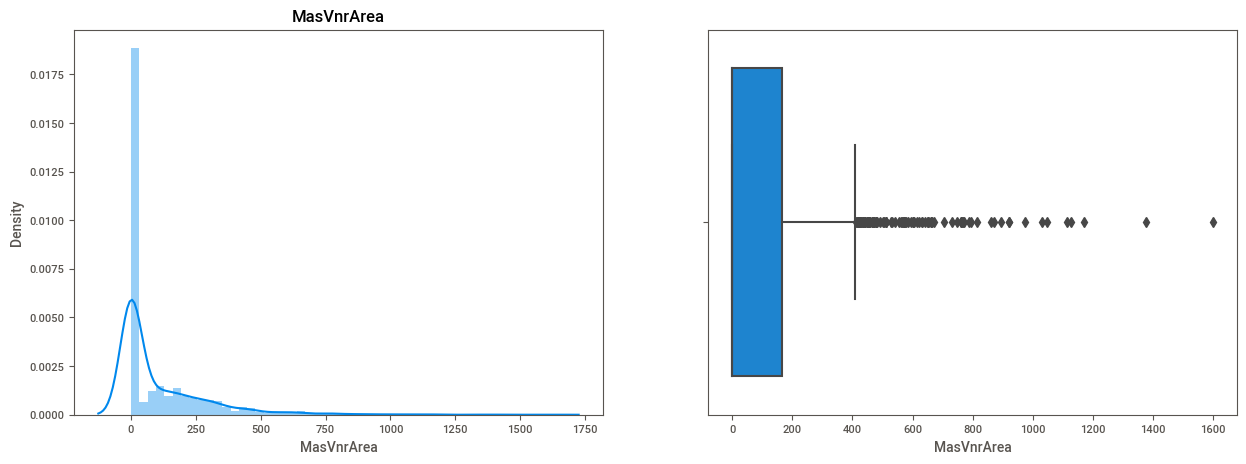

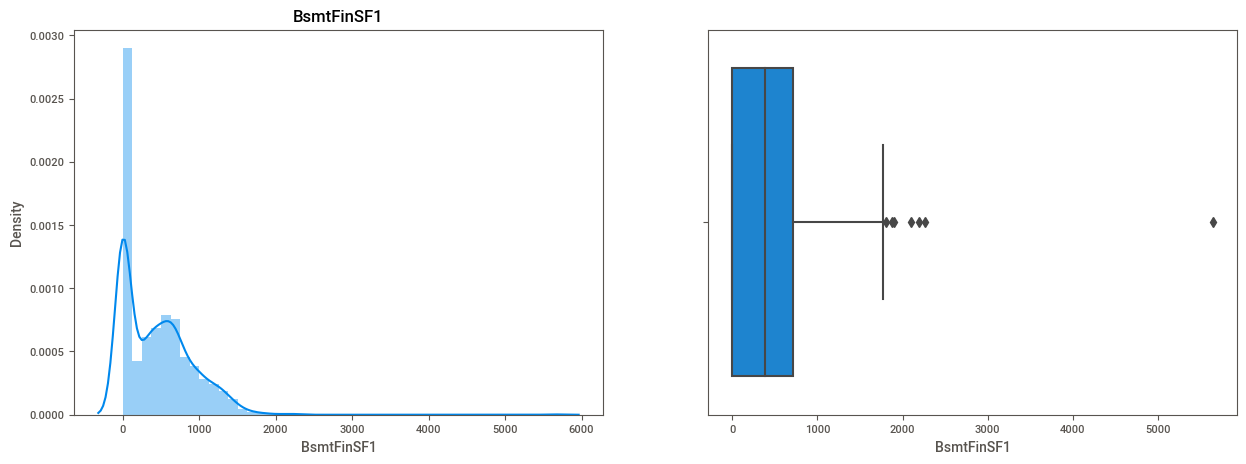

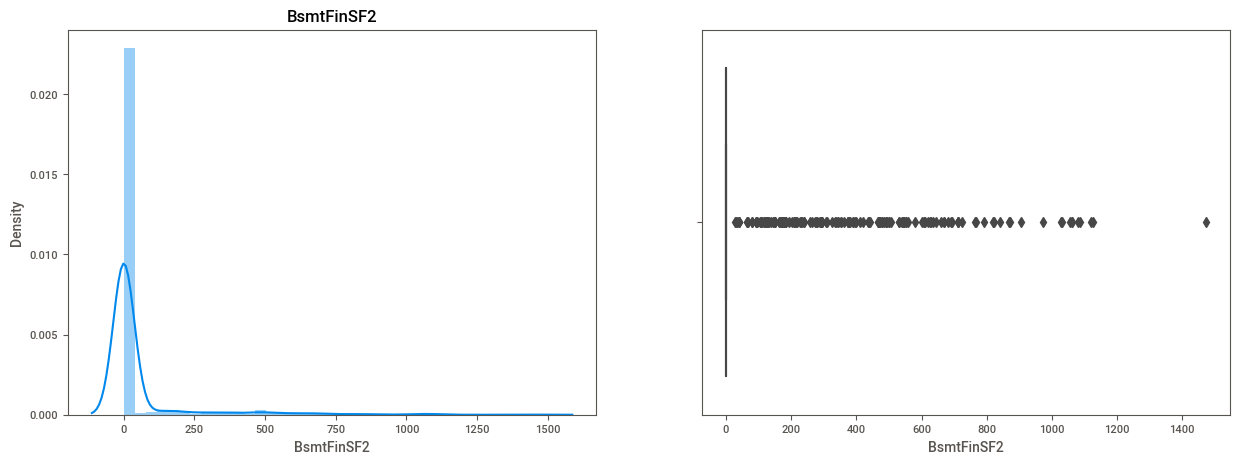

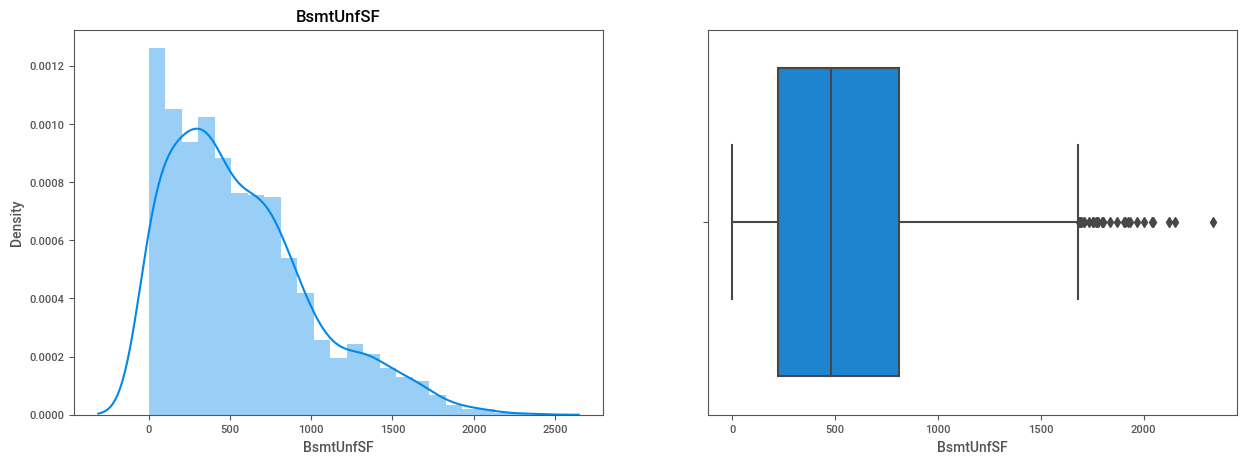

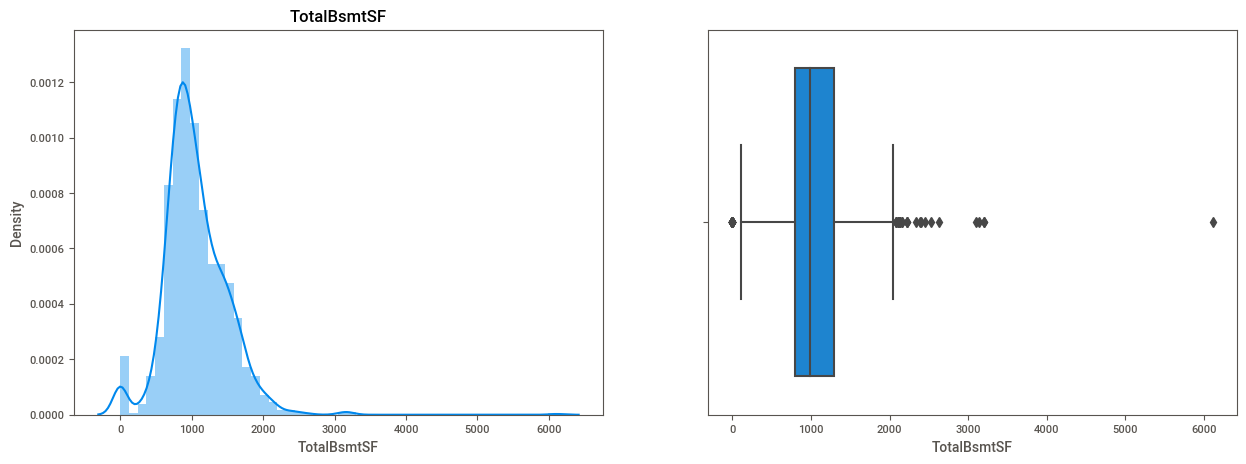

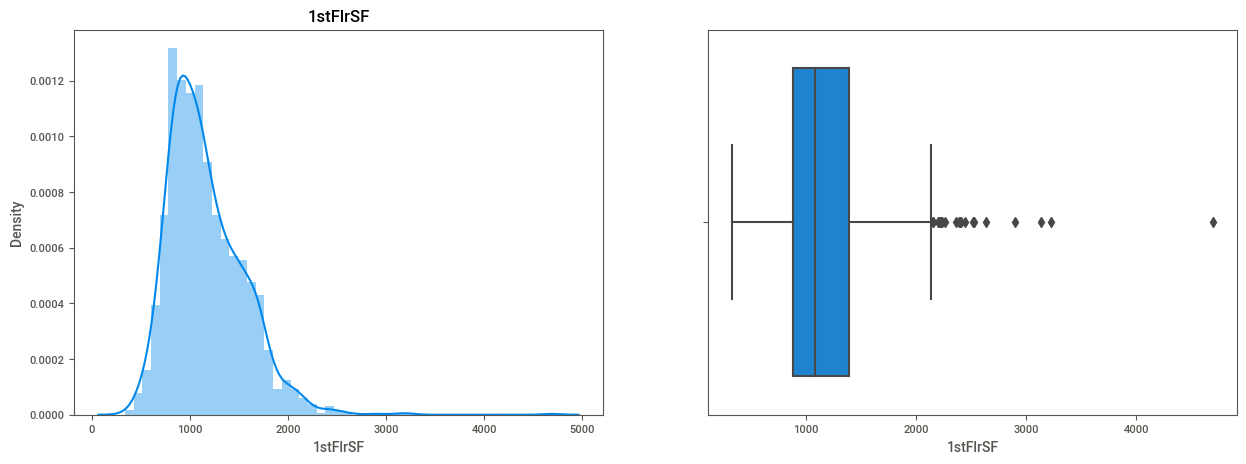

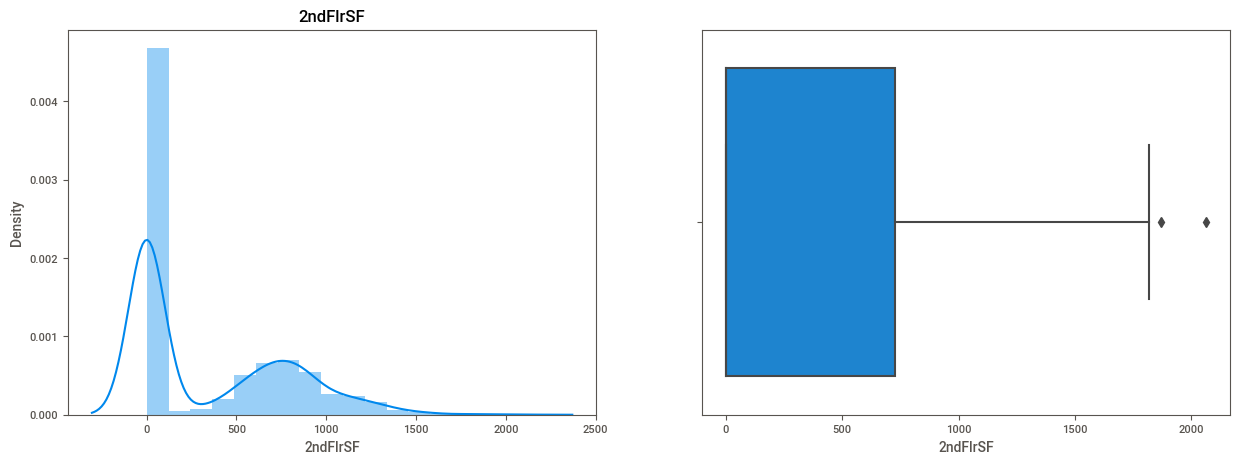

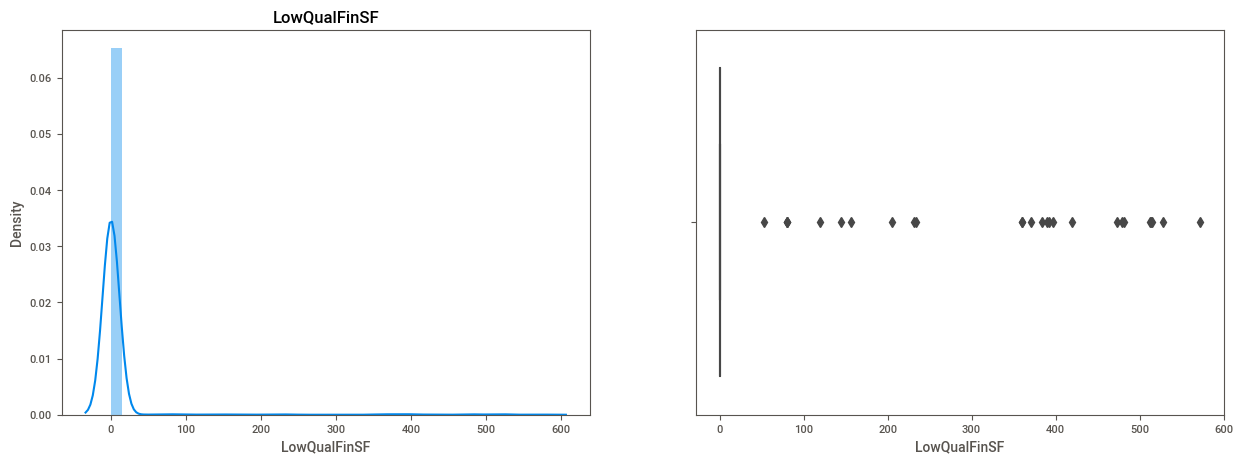

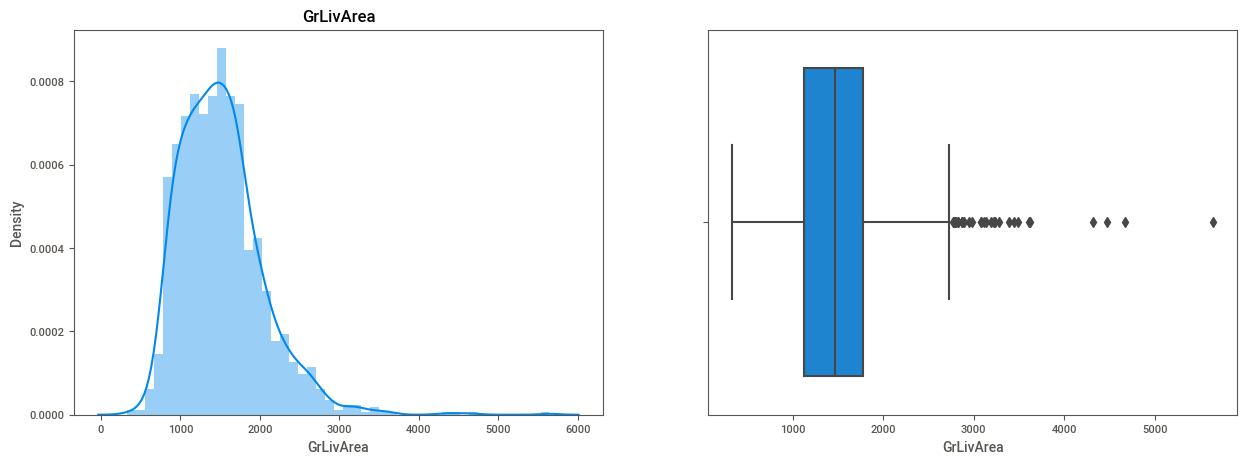

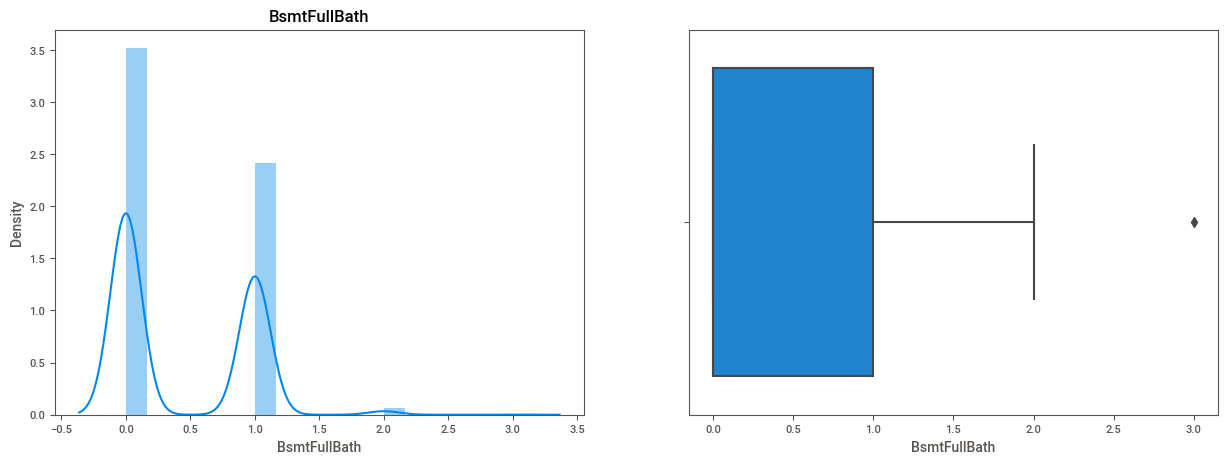

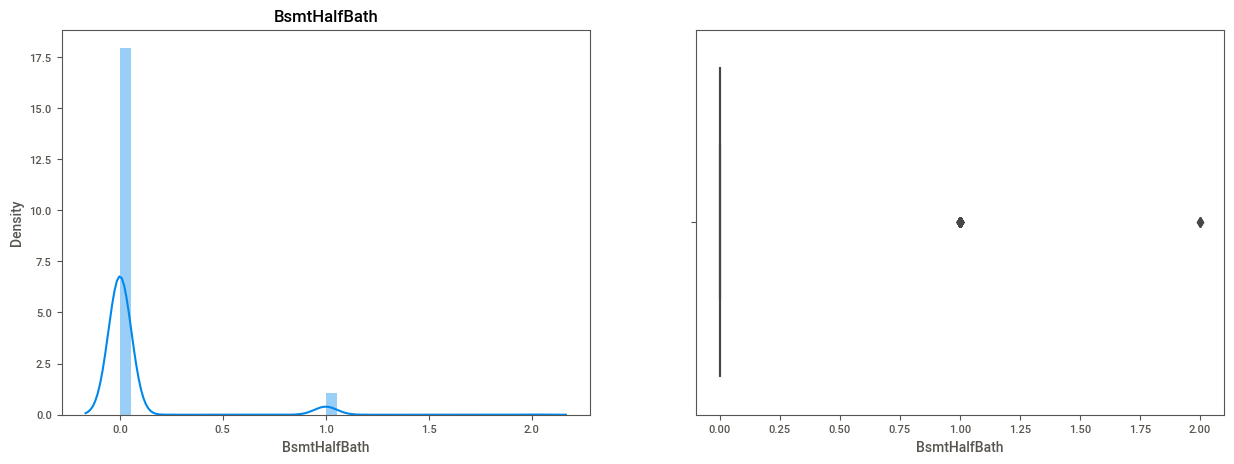

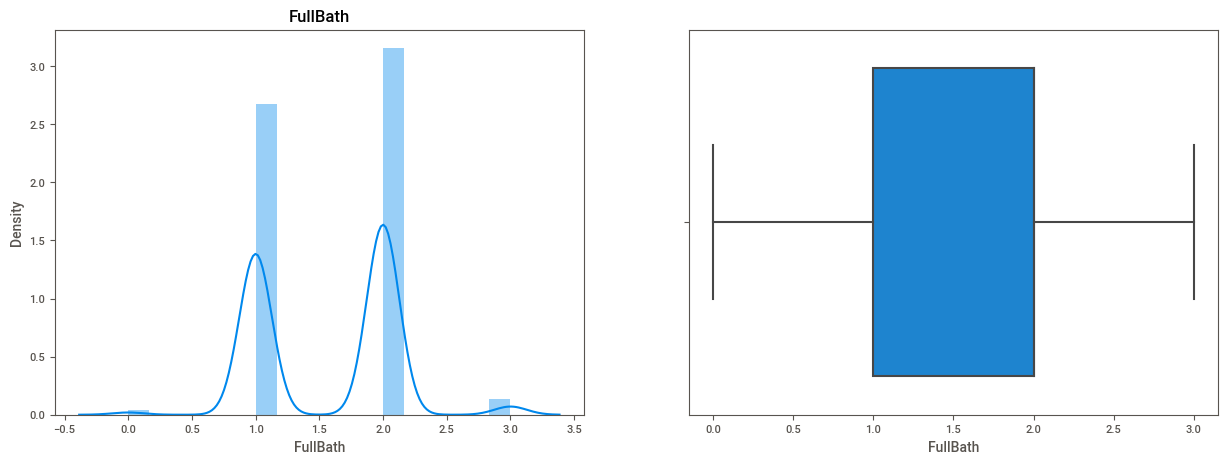

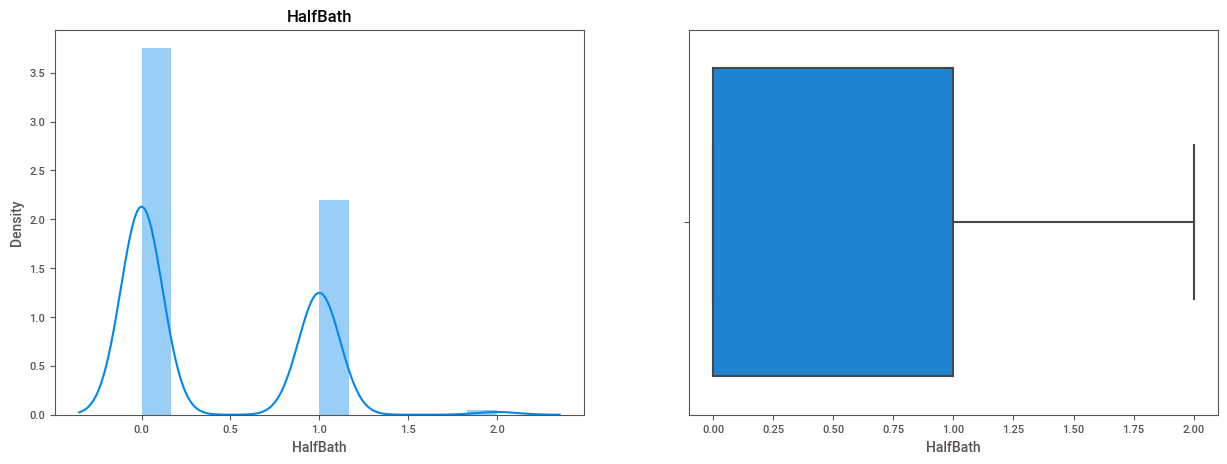

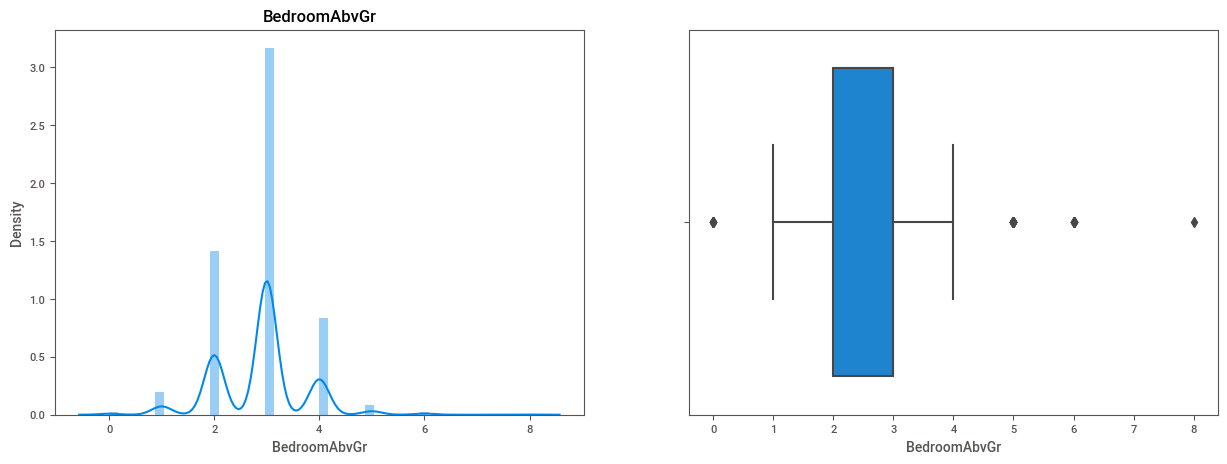

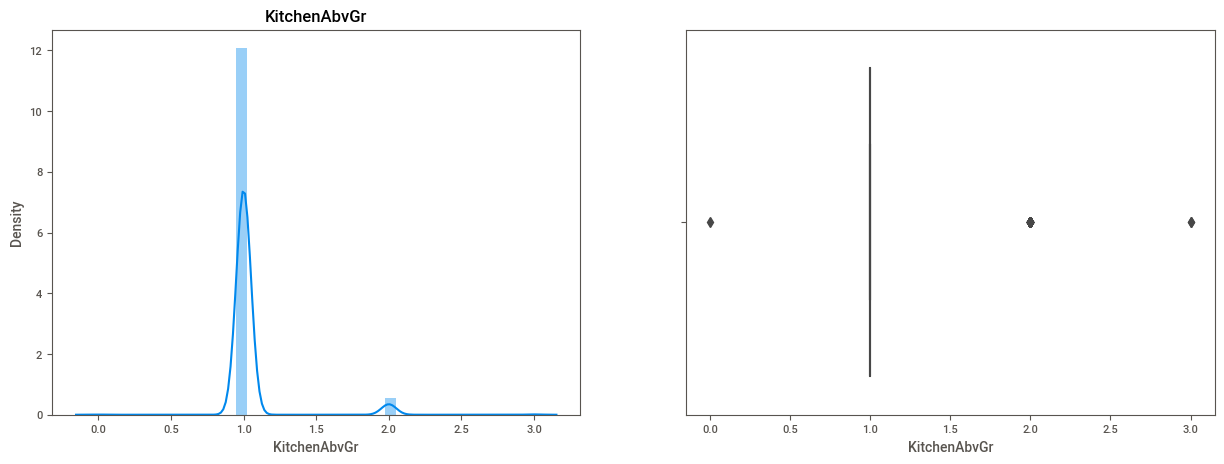

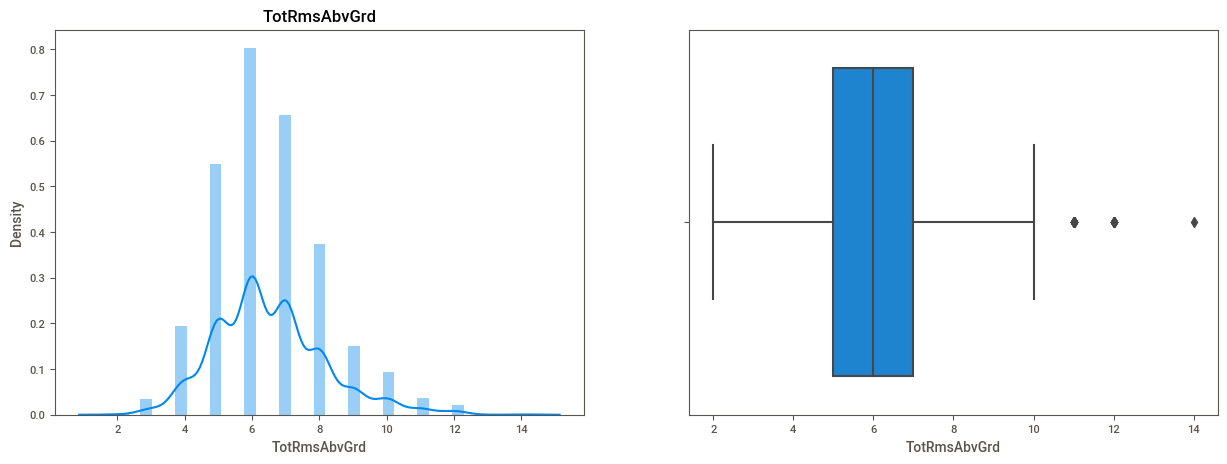

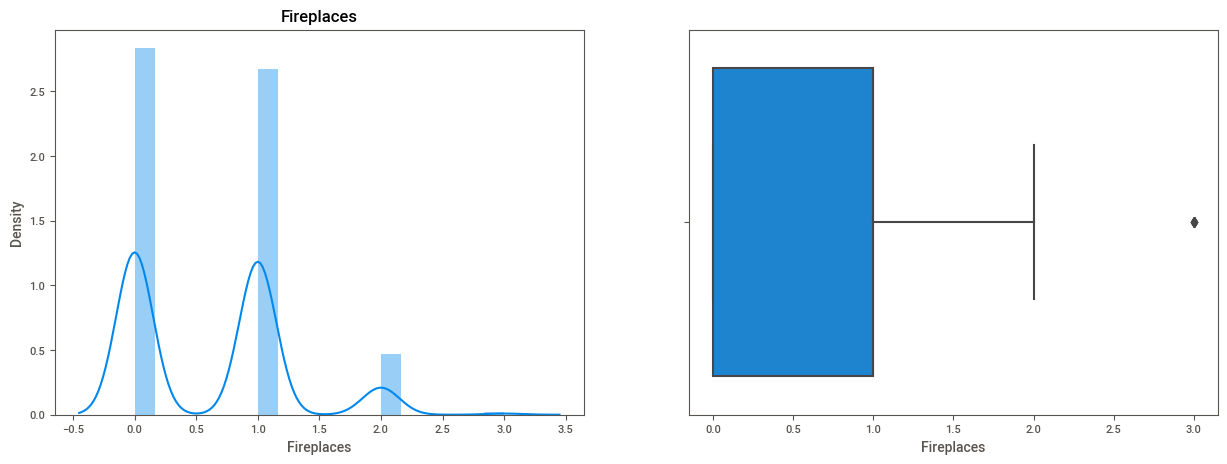

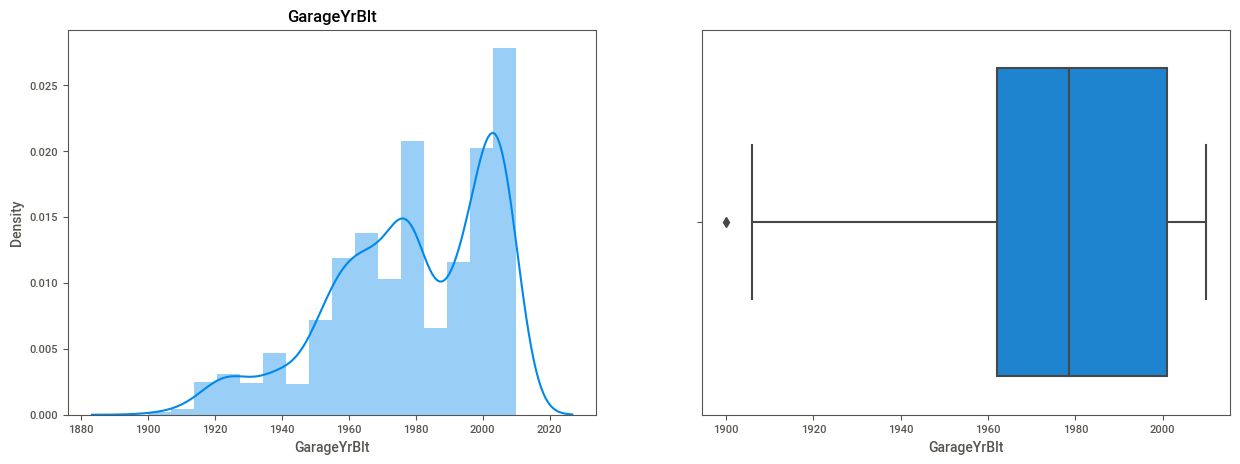

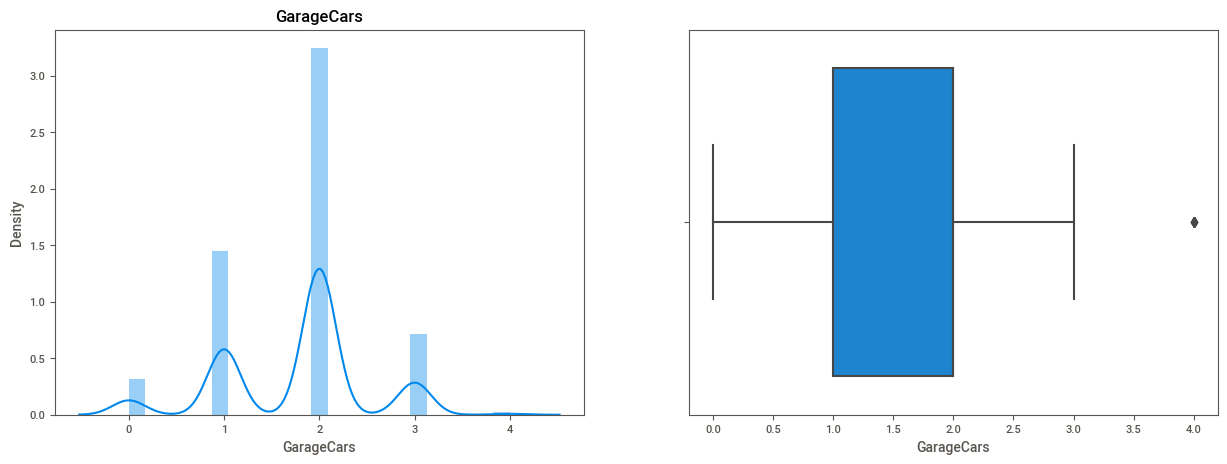

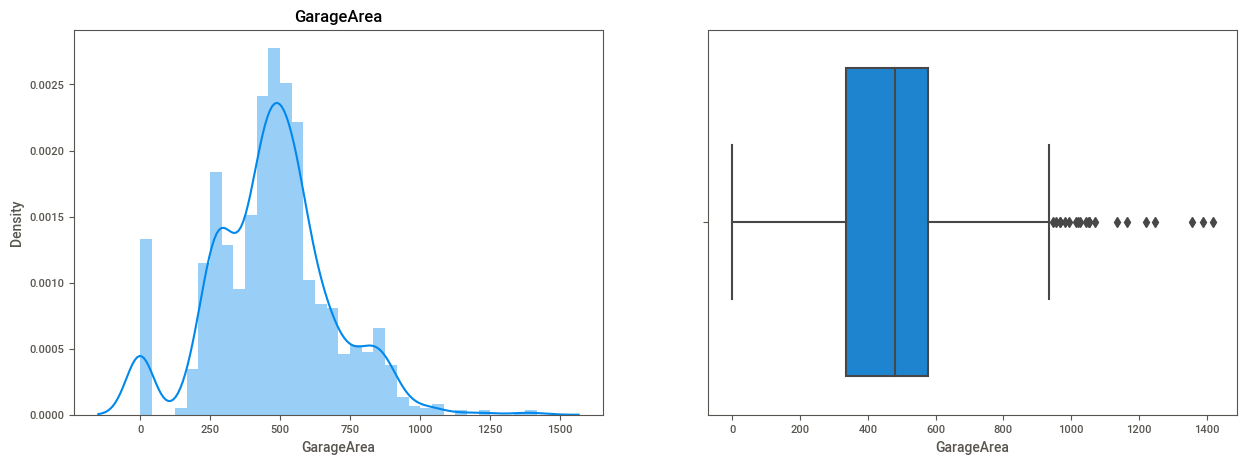

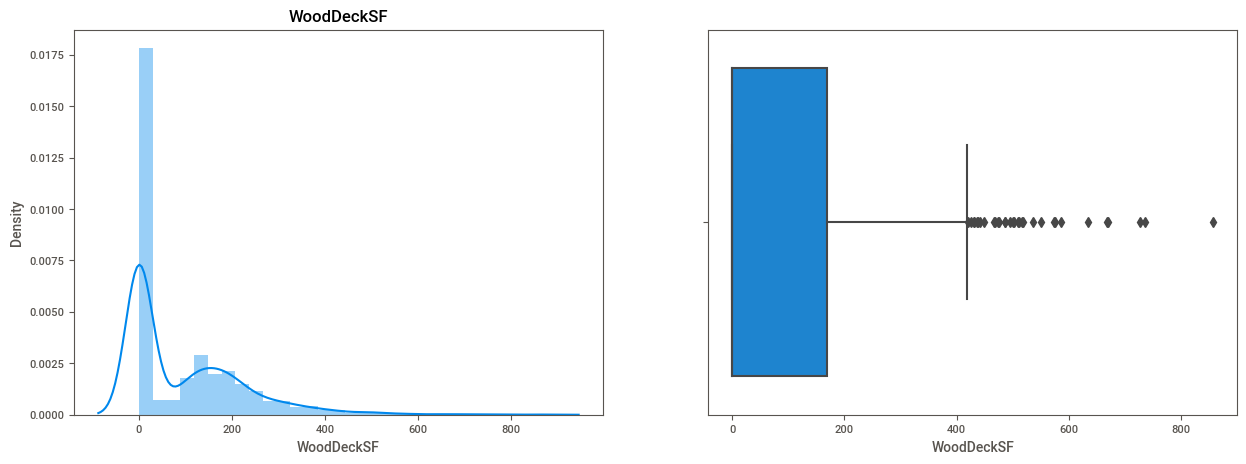

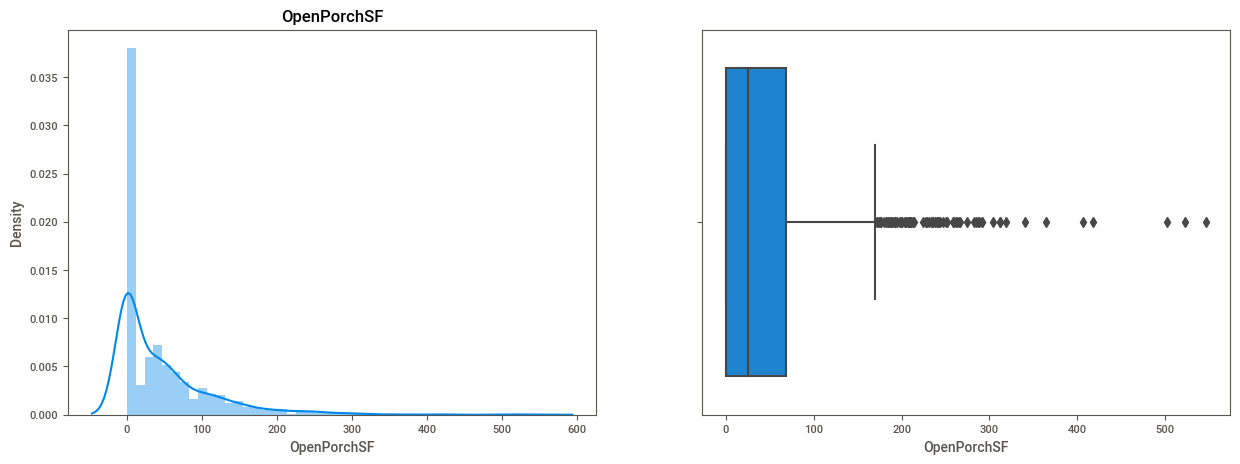

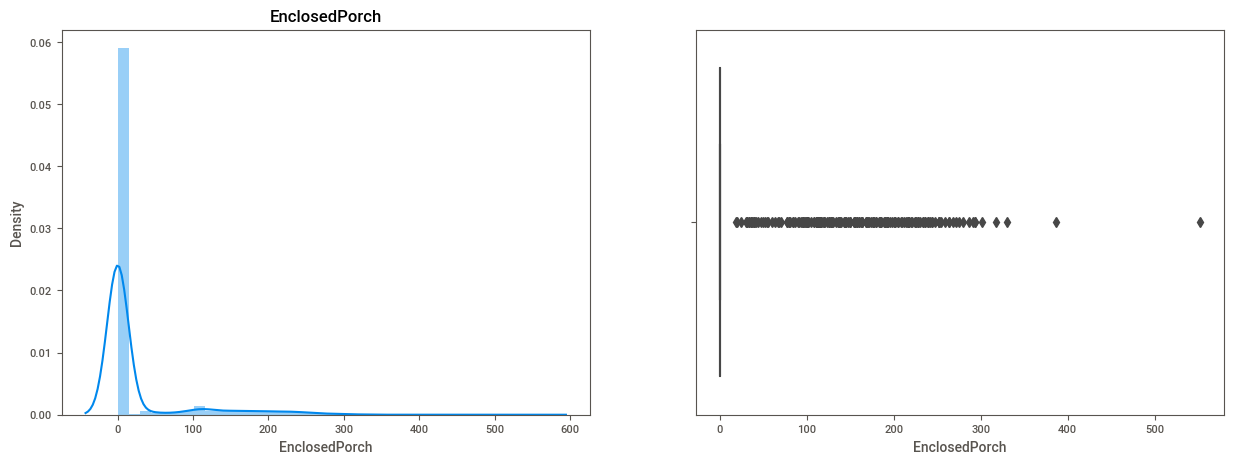

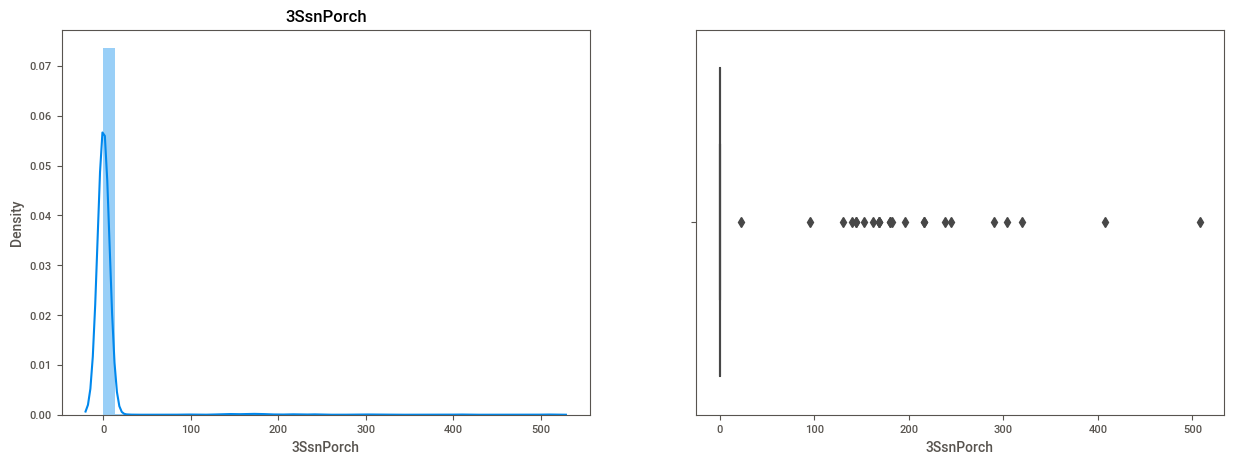

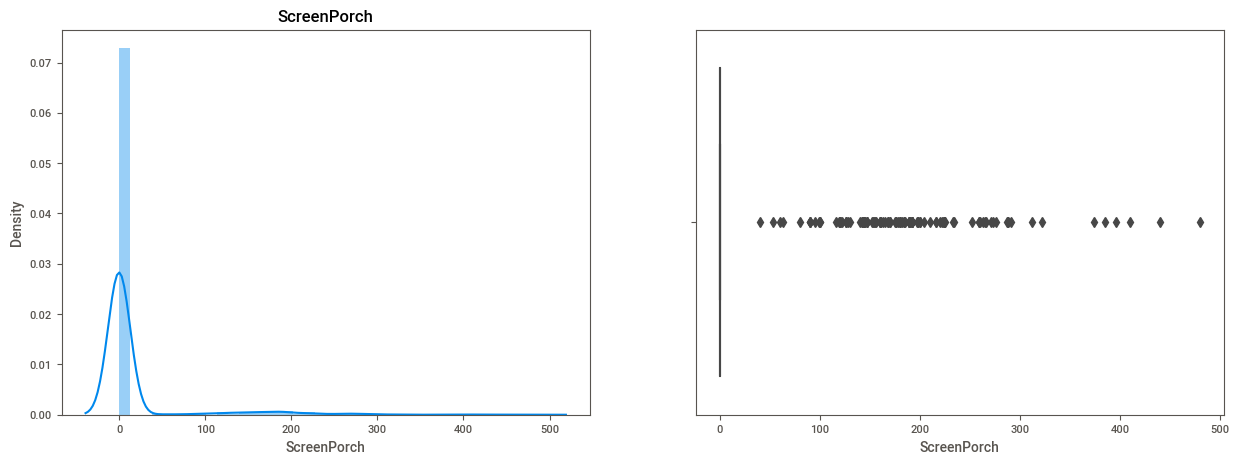

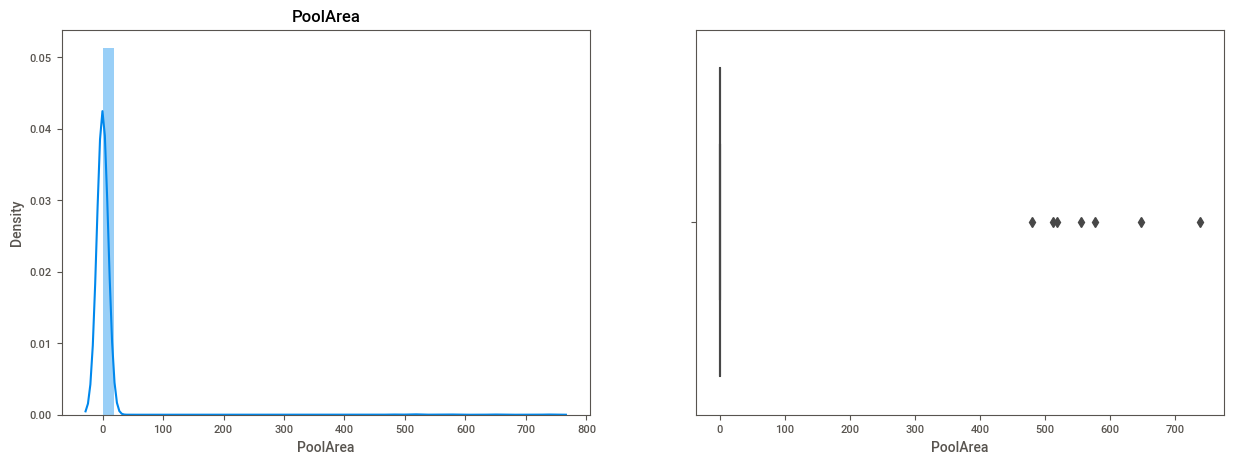

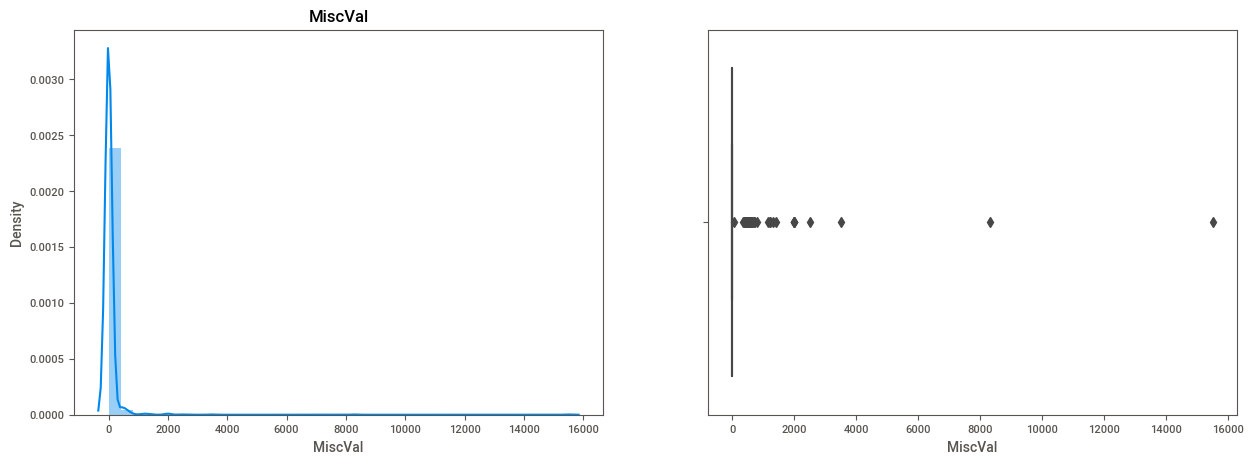

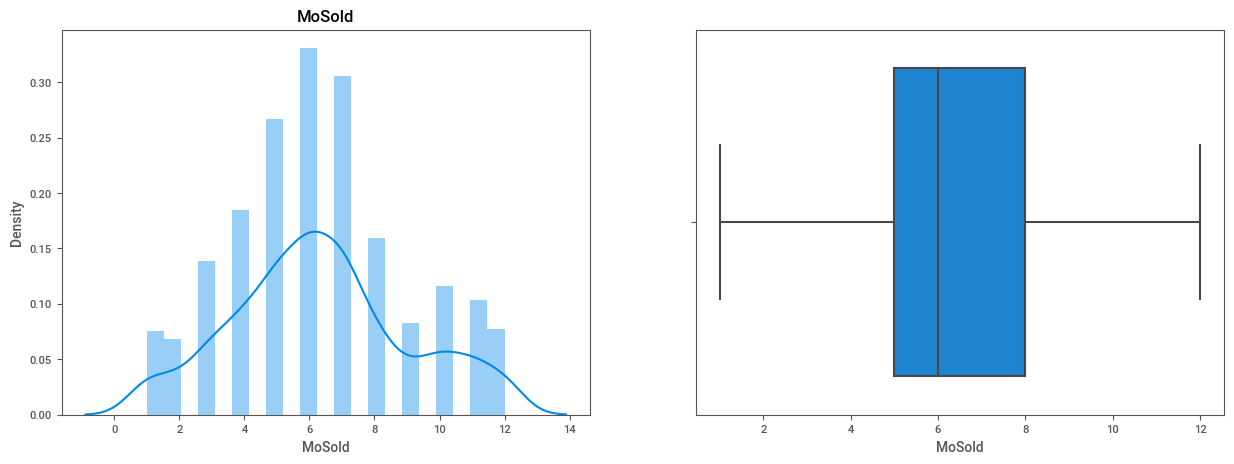

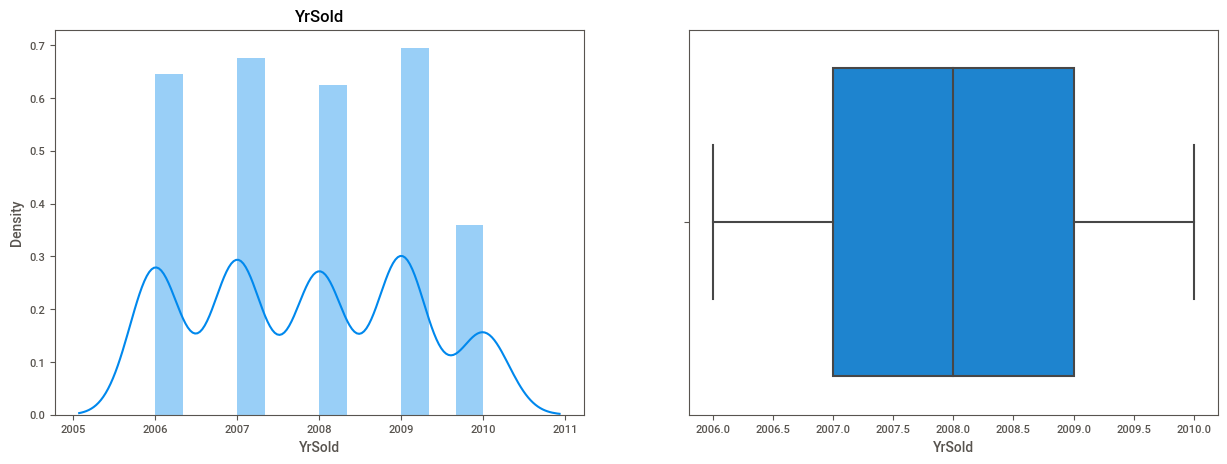

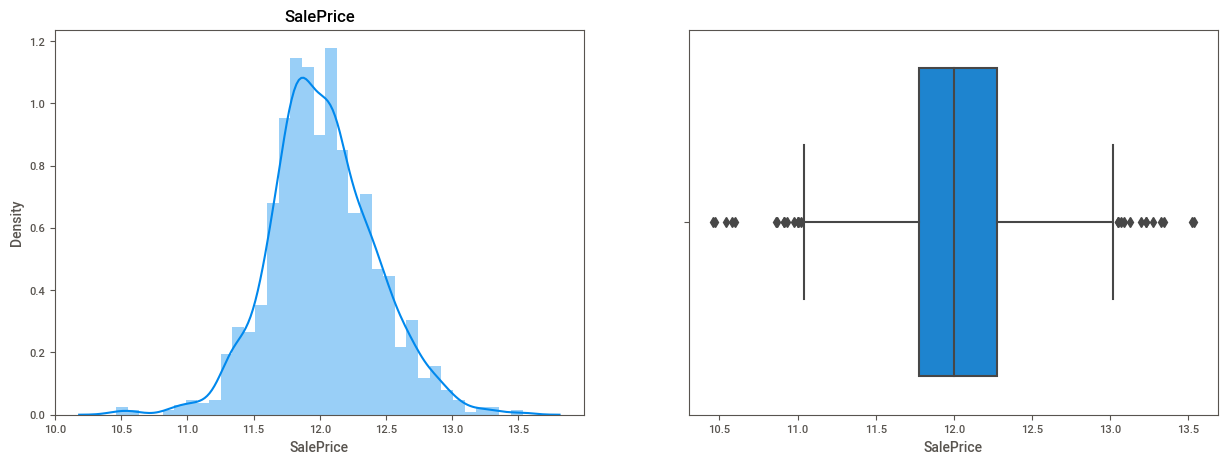

In [26]:
# Univariate analysis on the numerical features
for col in df_numerical.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col)
    sns.distplot(df[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show() 

#### Observation:

Most of the numerical variables have outliers and are not normally distributed

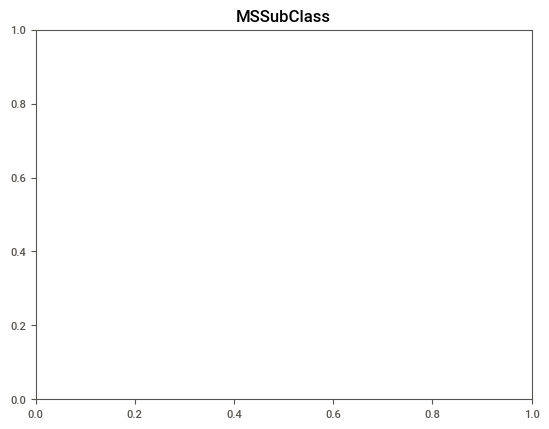

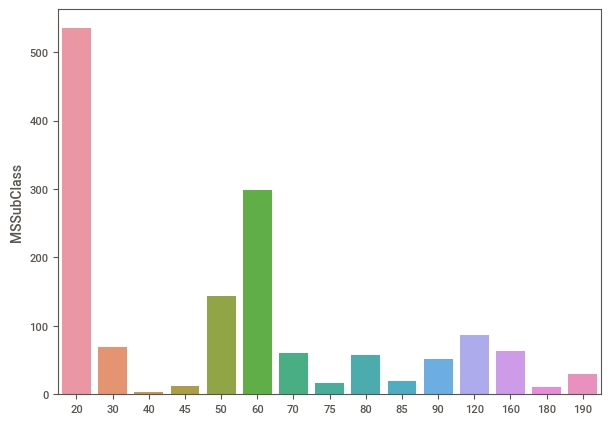

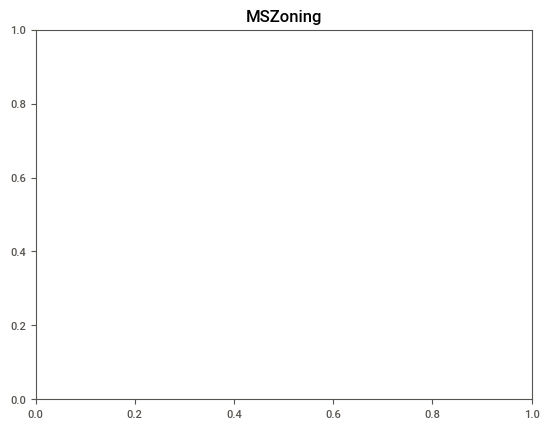

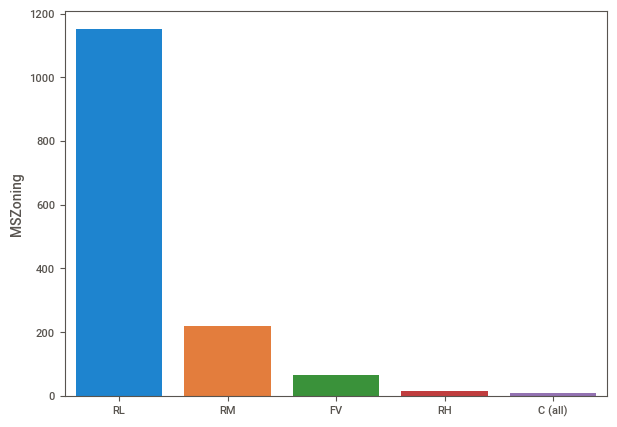

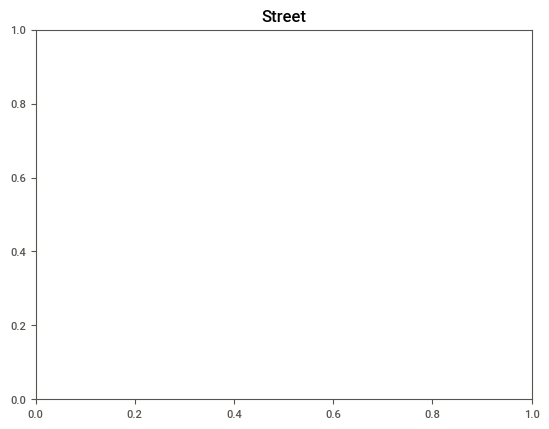

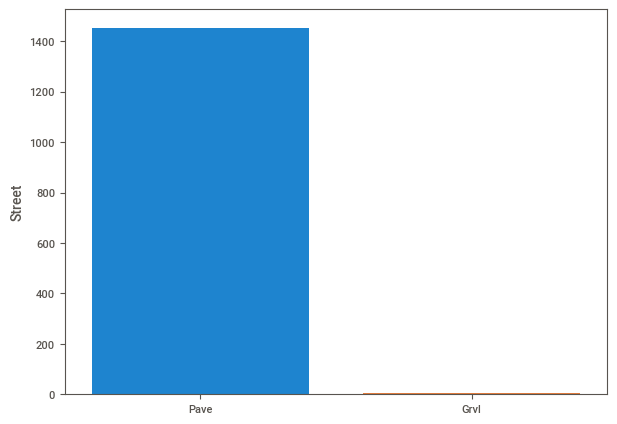

KeyError: 'Alley'

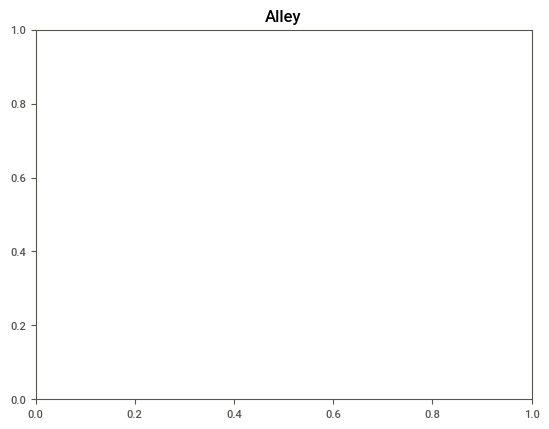

<Figure size 700x500 with 0 Axes>

In [27]:
# Univariate Analysis on the categorical features
for col in df_categorical.columns:
    plt.title(col)
    plt.figure(figsize=(7,5))
    sns.barplot(df[col].value_counts().index, df[col].value_counts())
    plt.show() 

<AxesSubplot:>

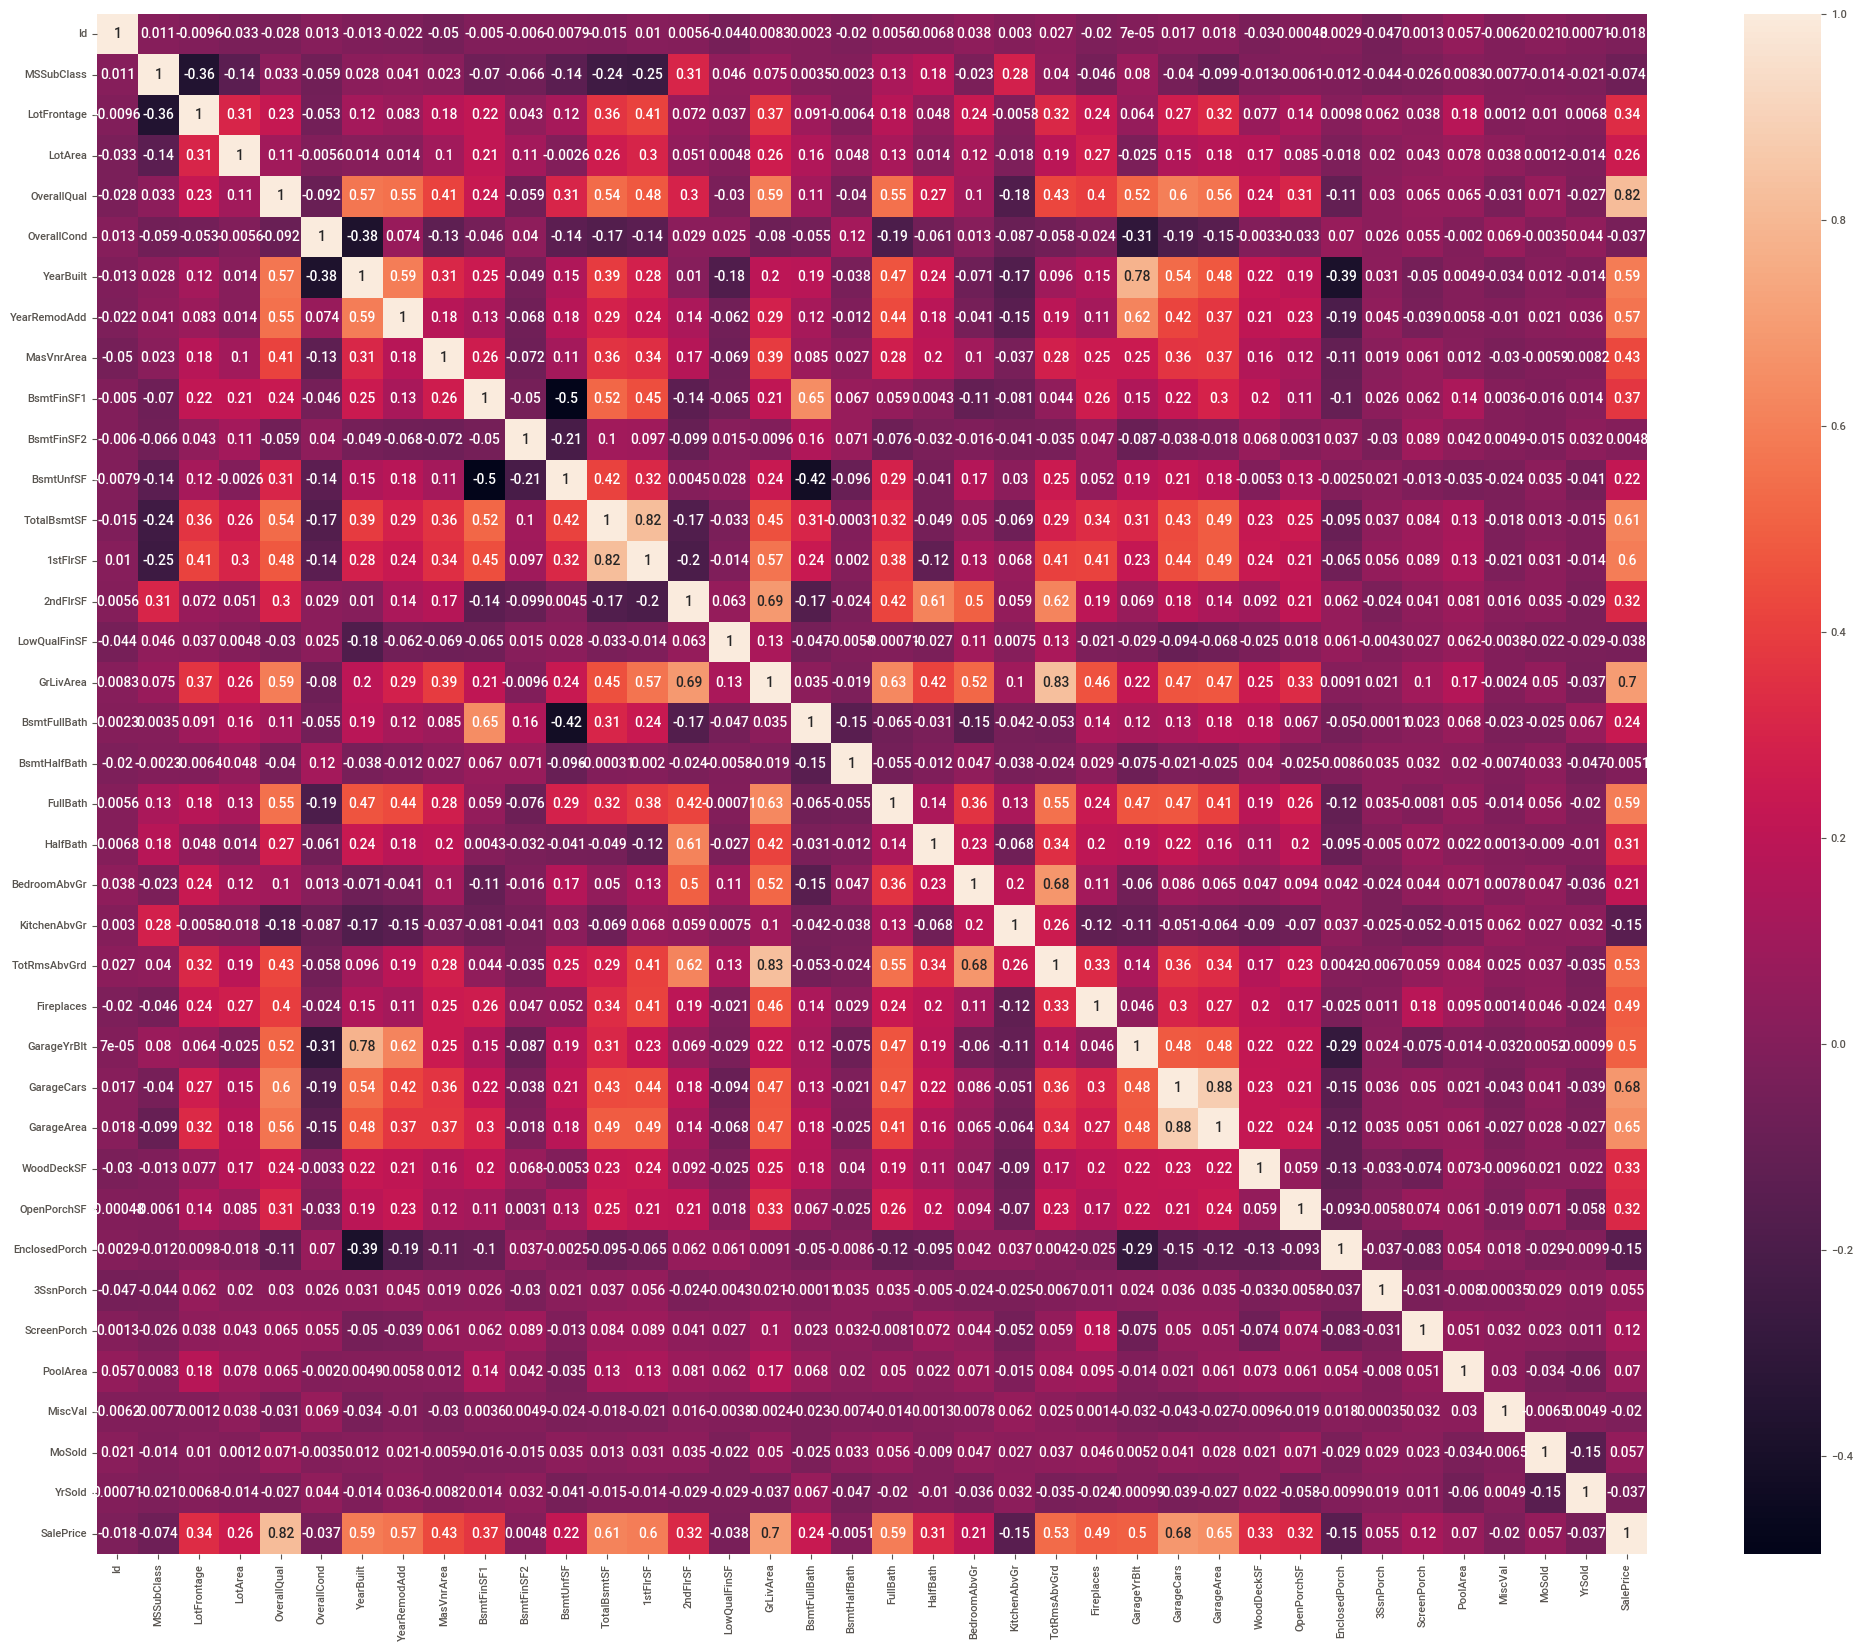

In [28]:
# Bivariate Aanalysis - Plotting a heatmap to see the correlations between variables
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True)

#### Observation:

Target variable 'SalePrice' has high correlation with OverallQual, GrLivArea, GarageCars and GarageArea.
We can see multicollinearity among predictors. For example, 'GarageCars' and 'GarageArea' are highly correlated.

#### Derived Metrics

In [29]:
# Deriving House Age from Year Sold and Year Built
df['Age'] = df['YrSold'] - df['YearBuilt']

df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [30]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,WD,Normal,12.429216,8


## 4. Data Preprocessing

### Creating Dummy Variables

In [31]:
# Creating dummies for categorical variables
df_cat_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_cat_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Handling Outliers

From the EDA we performed, we see that many of the variables had outliers. Now we will take necessary steps to handle outliers

<AxesSubplot:>

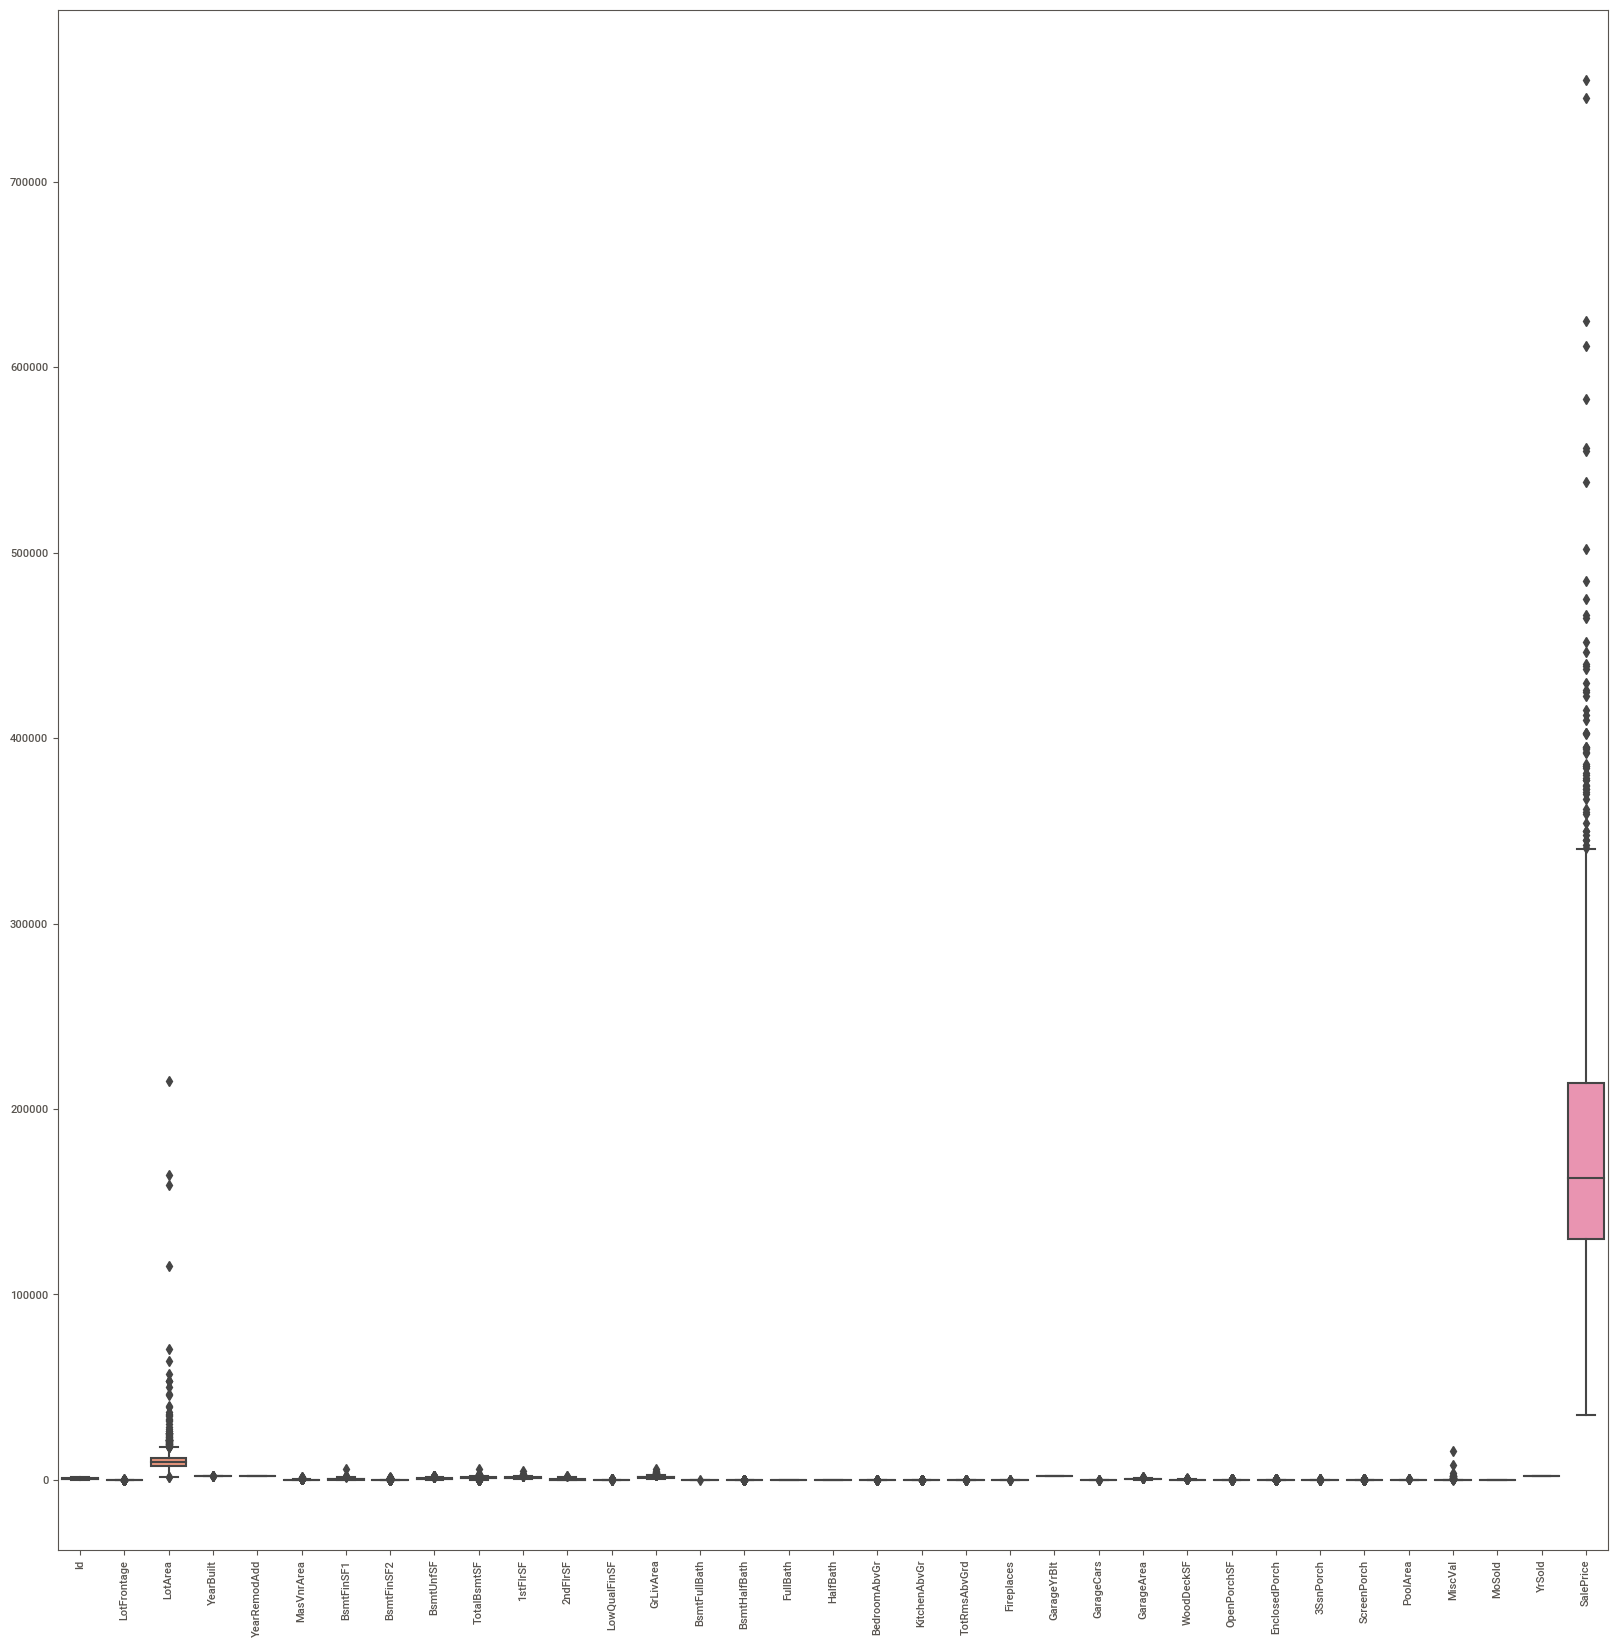

In [32]:
# Visualizing the outliers for each variable
plt.figure(figsize=[20,20])
plt.xticks(rotation=90)
sns.boxplot(data=df_numerical)

In [33]:
## Handling outliers by having cutoffs - 10% as lower bound and 90% as upper bound
for col in df_numerical.columns:
    df_numerical[col][df_numerical[col] <= df_numerical[col].quantile(0.10)] = df_numerical[col].quantile(0.10)
    df_numerical[col][df_numerical[col] >= df_numerical[col].quantile(0.90)] = df_numerical[col].quantile(0.90)

<AxesSubplot:>

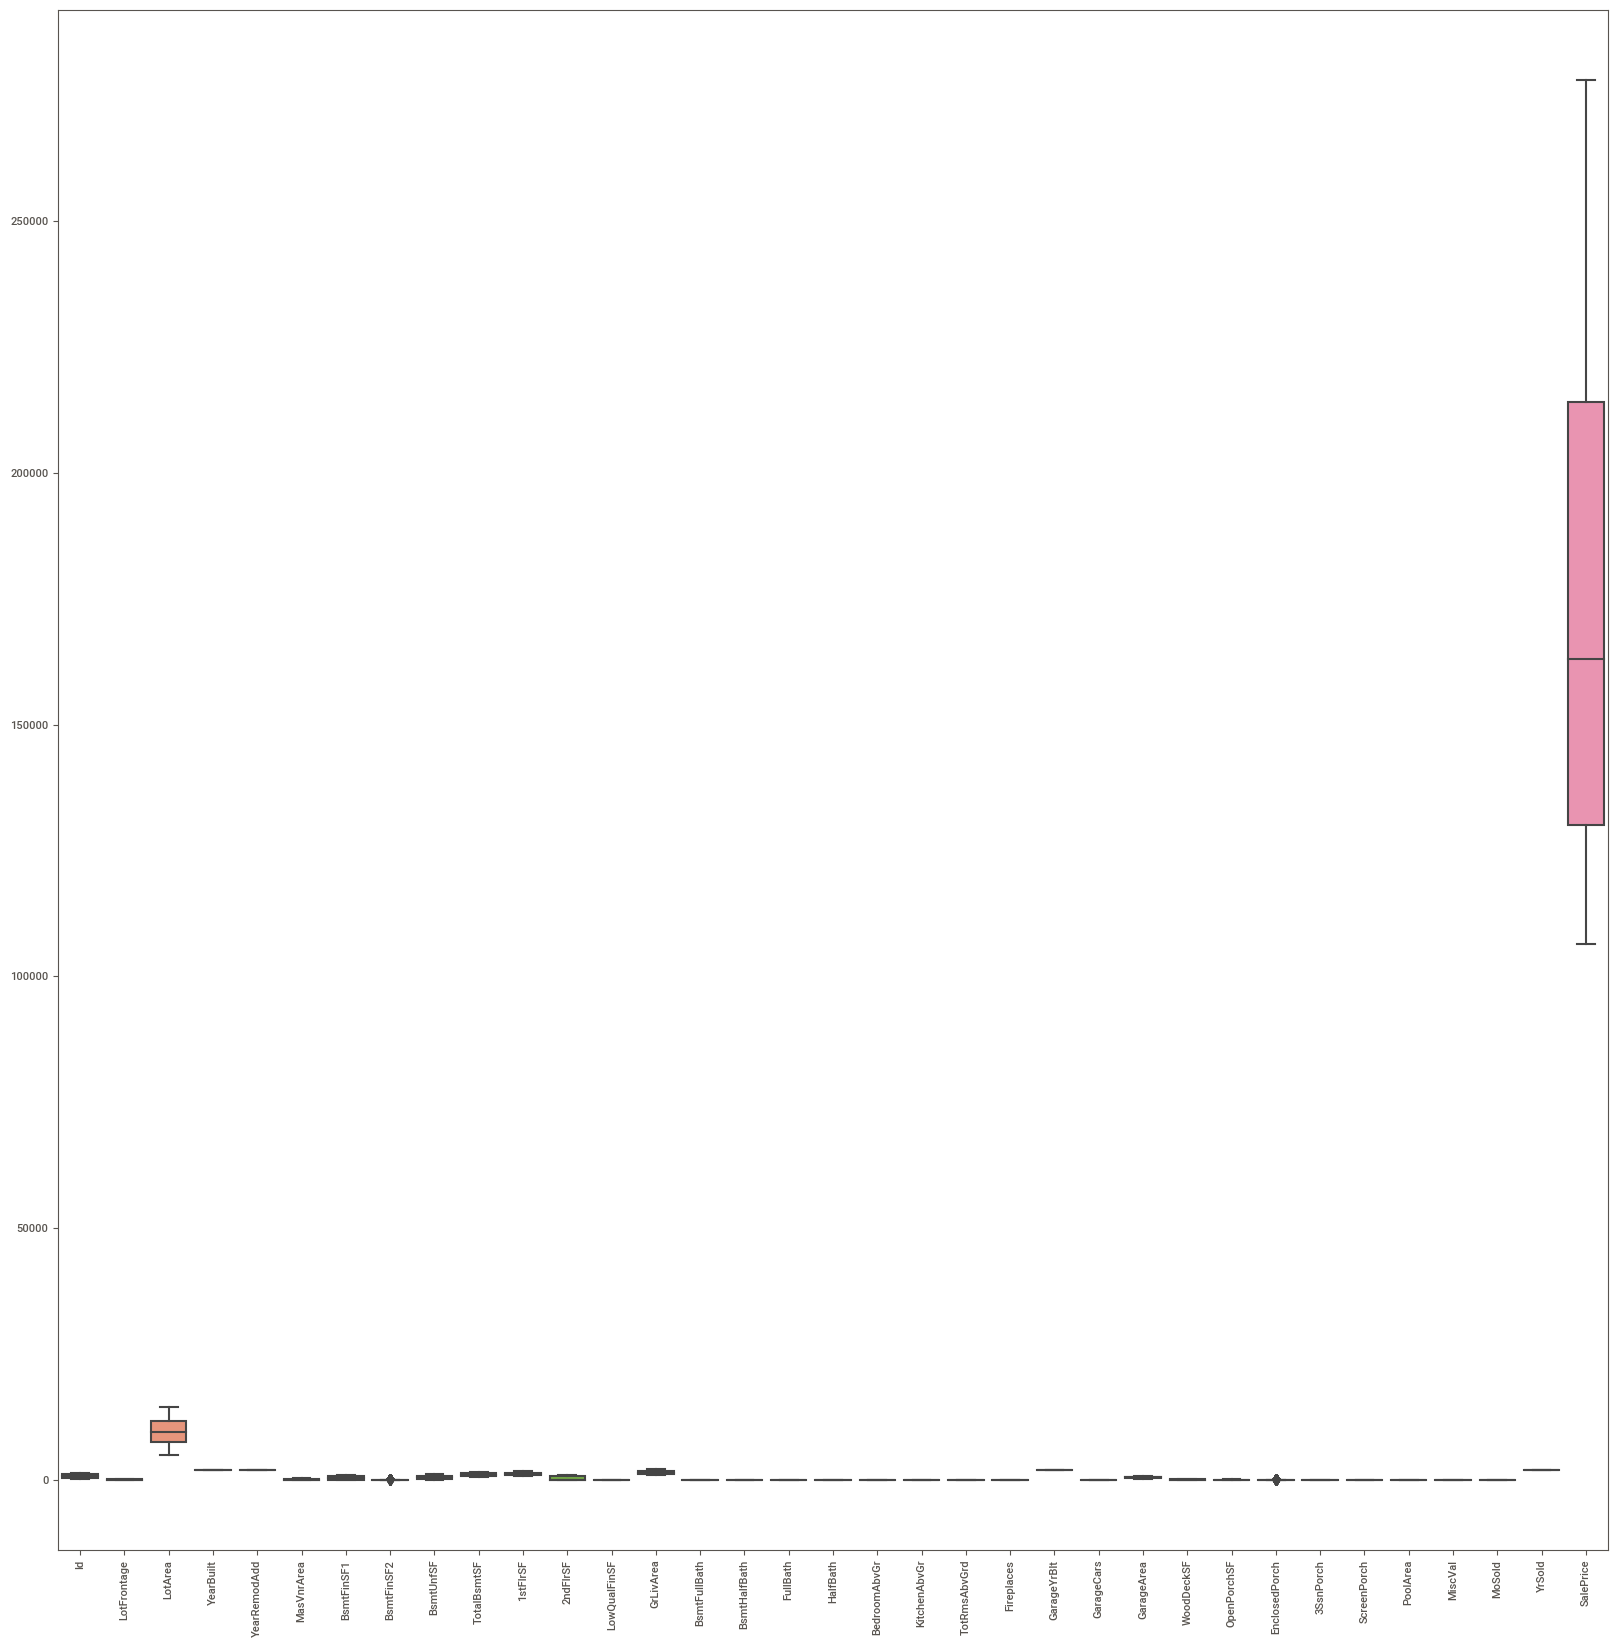

In [34]:
# Visualizing the outliers again
plt.figure(figsize=[20,20])
plt.xticks(rotation=90)
sns.boxplot(data=df_numerical)

In [35]:
df = pd.concat([df_numerical, df_cat_dummies], axis=1)

In [36]:
df.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,146.9,65.0,8450.0,2003.0,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,146.9,80.0,9600.0,1976.0,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,146.9,68.0,11250.0,2001.0,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,146.9,60.0,9550.0,1924.9,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,0,1,0,0,0,0,0
4,146.9,84.0,14260.0,2000.0,2000,335.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
# Checking for NaN values again after changes to the dataframe
df.isna().sum()[df.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [38]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)

In [39]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [40]:
df.isna().sum().sum()

0

## 5. Creating, training and evaluating Models 

##### Splitting data into X and y

In [41]:
X = df.drop(['Id', 'SalePrice'], axis=1).copy()
y = df['SalePrice'].copy()

#### Splitting the data into training set and test data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=True)

In [43]:
print(X_train.shape)
print(X_test.shape)

(1168, 273)
(292, 273)


In [44]:
print(y_train.shape)
print(y_test.shape)

(1168,)
(292,)


#### Scaling the numerical columns

In [45]:
numerical_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

In [46]:
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Building a multiple linear regression model

In [47]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [48]:
y_pred = lr.predict(X)
y_pred

array([205396.72647505, 190491.37931717, 218693.79911972, ...,
       257075.06854493, 142231.94191751, 148616.31418383])

In [49]:
# Residual Analysis
residuals = y - y_pred

In [50]:
# Metrics to evaluate the MLR model

print(r2_score(y, y_pred))                     #r2 score
print(np.sum(np.square(residuals)))            #rss
print(mean_squared_error(y, y_pred))           #mse
print(mean_squared_error(y, y_pred)**0.5)      #rmse

0.9398751518291999
267816611546.75842
183436035.30599892
13543.85599842227


<function matplotlib.pyplot.show(close=None, block=None)>

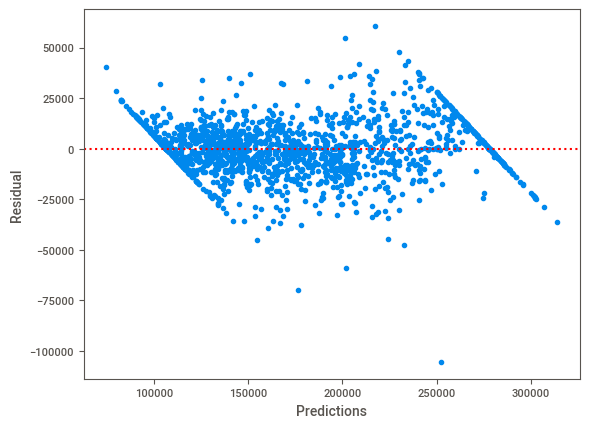

In [51]:
# Residuals Vs Prdictors plot

plt.scatter( y_pred , residuals)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show

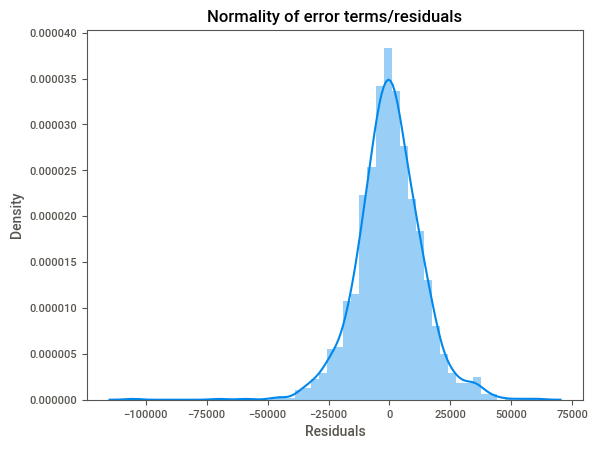

In [52]:
# Plotting the distribution of errors
p = sns.distplot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

##### Observations:

From the above metrics and plots we can see there some linear regression assumptions are failed to be satisfied. The Residuals Vs Predictors plot shows a clear pattern . Hence, we can conclude linear regression does not seem to be correct fit. 

### Building a Ridge Regression model

In [53]:
# Finding optimal value of alpha for ridge regression model 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# Cross Validation
ridgeCV = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = 5, return_train_score=True, verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.04687324, 0.03125205, 0.03437271, 0.02812314, 0.03437071,
        0.03437252, 0.031247  , 0.0281261 , 0.03125324, 0.03437538,
        0.02187786, 0.028128  , 0.02812834, 0.02812805, 0.02812123,
        0.02499895, 0.02812405, 0.02187243, 0.03124986, 0.03124771,
        0.02500105, 0.02187452, 0.02812667, 0.03124957, 0.02812347,
        0.03125029, 0.03437772, 0.02499838]),
 'std_fit_time': array([9.88121306e-03, 2.07629595e-06, 6.24923803e-03, 6.25205392e-03,
        6.24833173e-03, 6.24837913e-03, 9.88091140e-03, 6.25078706e-03,
        2.73340428e-06, 6.25195637e-03, 7.65134640e-03, 6.24923760e-03,
        6.24892762e-03, 6.25188389e-03, 6.24895137e-03, 7.65350700e-03,
        6.24892712e-03, 7.65773153e-03, 2.22433162e-06, 2.37750070e-06,
        7.65531948e-03, 7.65524362e-03, 6.25071768e-03, 1.24709099e-06,
        1.16915709e-02, 9.88272100e-03, 6.24589959e-03, 7.65557162e-03]),
 'mean_score_time': array([0.00312462, 0.01249957, 0.00312443, 0.00312395, 

In [55]:
ridgeCV.best_params_

{'alpha': 20}

##### Optimal Value of alpha for Ridge Regression is 20.0

In [57]:
# Fitting ridge model with alpha value 20.0 in training data

ridge = Ridge(alpha=20.0)
ridge.fit(X_train, y_train)

Ridge(alpha=20.0)

In [58]:
ridge_coefs = ridge.coef_

In [59]:
# Making predicitons
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [60]:
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)
    
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)
    
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =", '%.2f' % rmse_train) 
print("RMSE (Test) =", '%.2f' % rmse_test) 

R-Squared (Train) = 0.92
R-Squared (Test) = 0.91
RSS (Train) = 273012209694.75
RSS (Test) = 85082522015.81
MSE (Train) = 233743330.22
MSE (Test) = 291378500.05
RMSE (Train) = 15288.67
RMSE (Test) = 17069.81


In [61]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)

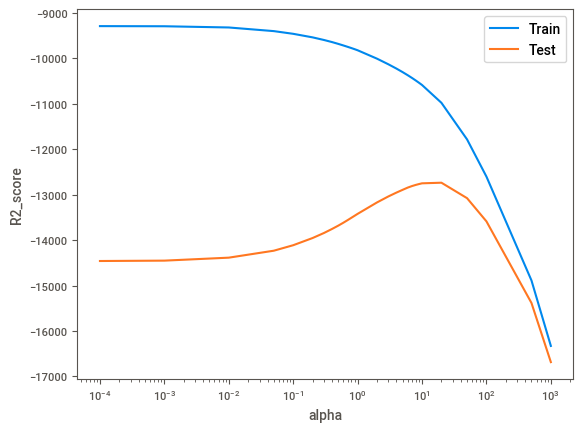

In [62]:
# Plotting R2 score vs alpha values to confirm the alpha value we used

plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

##### From above plot, we can see that the optimal alpha value we used (20.0) is correct

### Building a Lasso Regression model

In [63]:
# Finding optimal value of alpha for lasso regression model 
lasso = Lasso() 

# cross validation
lassoCV = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5,  return_train_score=True, verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
lassoCV.cv_results_

{'mean_fit_time': array([1.14549694, 1.38035002, 1.30914059, 1.35980659, 1.18760147,
        1.03743281, 1.06867175, 1.10617232, 1.25600905, 1.407061  ,
        1.4336072 , 1.13593545, 1.10959067, 1.06867557, 0.89056439,
        0.66557851, 0.58121271, 0.56871252, 0.48746743, 0.48434019,
        0.44997015, 0.45621829, 0.41559677, 0.17499213, 0.15936575,
        0.09686785, 0.05312529, 0.04375024]),
 'std_fit_time': array([0.15756525, 0.16830528, 0.20486491, 0.26502379, 0.20058587,
        0.08648379, 0.12906365, 0.14835474, 0.19419085, 0.14262522,
        0.10619313, 0.09858553, 0.10449389, 0.1224648 , 0.14455387,
        0.18422957, 0.21248592, 0.21595134, 0.22082158, 0.20130159,
        0.12553348, 0.13123789, 0.0995994 , 0.02296176, 0.06584244,
        0.03186803, 0.00765482, 0.00625191]),
 'mean_score_time': array([0.01763735, 0.01462722, 0.01614351, 0.01782727, 0.01562333,
        0.01562142, 0.01249967, 0.01562057, 0.01273065, 0.0125771 ,
        0.02430558, 0.01562433, 0.015625

In [65]:
lassoCV.best_params_

{'alpha': 100}

##### Optimal Value of alpha for Lasso Regression is 100.0

In [66]:
# Fitting lasso model with alpha value 100.0 in training data

lasso = Lasso(alpha=100.0)
lasso.fit(X_train, y_train)

Lasso(alpha=100.0)

In [67]:
lasso_coefs = lasso.coef_

In [68]:
# Making predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [69]:
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)
    
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)
    
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =", '%.2f' % rmse_train) 
print("RMSE (Test) =", '%.2f' % rmse_test) 

R-Squared (Train) = 0.92
R-Squared (Test) = 0.91
RSS (Train) = 287410042350.52
RSS (Test) = 87251558811.54
MSE (Train) = 246070241.74
MSE (Test) = 298806708.26
RMSE (Train) = 15686.63
RMSE (Test) = 17286.03


In [70]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)

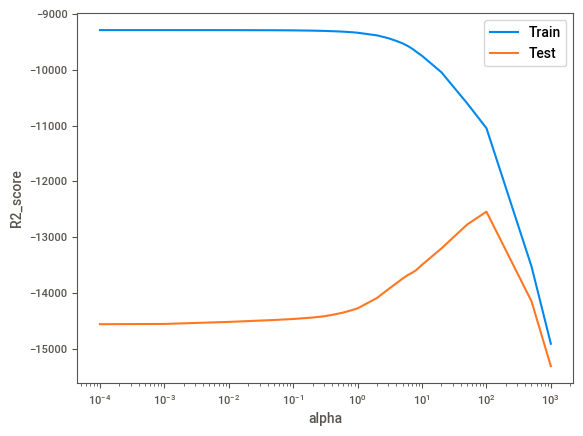

In [71]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

##### From above plot, we can see that the optimal alpha value we used (100.0) is correct

#### Comparing metrics from Ridge and Lasso models

R- Squared (Train) = Both Ridge and Lasso have same train R2 Scores (0.92)

R- Squared (Test)  = Both Ridge and Lasso have same test R2 Scores (0.91)

RSS (Train)        = 273012209694.75 for Ridge and 287410042350.52 for Lasso

RSS (Test)         = 85082522015.81 for Ridge and 87251558811.54 for Lasso

MSE (Train)        = 233743330.22 for Ridge    and 246070241.74 for Lasso

MSE (Test)         = 291378500.05 for Ridge    and 298806708.26 for Lasso

RMSE (Train)       = 15288.67 for Ridge        and 15686.63 for Lasso

RMSE (Test)        = 17069.81 for Ridge        and 17286.03 for Lasso

#### All the metrics show both models perform similarly in test set

In [72]:
# Creating a dataframe to show the betas and their coefficient for both Ridge and Lasso models

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge_coefs
betas['Lasso'] = lasso_coefs

In [73]:
betas

,Ridge,Lasso
LotFrontage,339.477397,67.337125
LotArea,4462.849684,4808.068433
YearBuilt,4428.297210,4923.571558
YearRemodAdd,2791.341252,2561.648529
MasVnrArea,1262.135153,568.232901
...,...,...
SaleCondition_AdjLand,2467.561291,0.000000
SaleCondition_Alloca,1819.954981,0.000000
SaleCondition_Family,-2739.804806,-0.000000
SaleCondition_Normal,4773.375293,4505.552276


#### Observation:

From above dataframe we can see lasso has made most of feature to exactly 0 whereas Ridge has moved them close to 0. This indicactes that lasso model has performed feature selection

In [74]:
# Getting the top 10 features from both ridge and lasso models

ridge_coeffs = betas['Ridge']
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_8           14637.730679
GrLivArea               12670.784646
OverallQual_9           11633.524275
Neighborhood_Crawfor    10789.873260
Functional_Typ          10167.084071
Exterior1st_BrkFace      9693.957447
Neighborhood_Somerst     8091.538308
Neighborhood_NridgHt     7614.541088
TotalBsmtSF              7422.182880
OverallCond_9            7277.341784
Name: Ridge, dtype: float64

In [75]:
lasso_coeffs = betas['Lasso']
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           26262.323643
OverallQual_8           25052.125025
Neighborhood_Crawfor    16837.869599
GrLivArea               15493.330574
Exterior1st_BrkFace     14352.255406
OverallCond_9           13652.029930
Neighborhood_Somerst    13632.711020
Functional_Typ          12330.888559
Neighborhood_ClearCr     9738.205892
Neighborhood_NridgHt     9408.007568
Name: Lasso, dtype: float64

### Inferences :

1. The above outcomes show the most significant variables in predicting the price of a house and how well they describe the price of a house based on both Ridge regression and Lasso regression

2. The optimal alpha value for Ridge Regression = 20.0

2. The optimal alpha value for Lasso Regression = 100.0

## Assignment Part-II - Solving Subjective Questions

In [76]:
# Fitting ridge model with double the alpha value

ridge = Ridge(alpha=40.0)
ridge.fit(X_train, y_train)

Ridge(alpha=40.0)

In [77]:
ridge_coefs = ridge.coef_

In [78]:
# Making predicitons
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [79]:
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)
    
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)
    
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =", '%.2f' % rmse_train) 
print("RMSE (Test) =", '%.2f' % rmse_test) 

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 300514001244.66
RSS (Test) = 87714888770.05
MSE (Train) = 257289384.63
MSE (Test) = 300393454.69
RMSE (Train) = 16040.24
RMSE (Test) = 17331.86


In [80]:
ridgeCV_results = pd.DataFrame(ridgeCV.cv_results_)

In [81]:
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046873,0.009881,0.003125,0.006249,0.0001,{'alpha': 0.0001},-13845.499425,-16142.060242,-14834.282143,-13852.980500,...,-14460.413720,939.039435,26,-9512.860565,-9044.511913,-9283.002135,-9369.730503,-9233.052424,-9288.631508,154.642050
1,0.031252,0.000002,0.012500,0.006250,0.001,{'alpha': 0.001},-13836.840218,-16129.920971,-14823.283889,-13846.772298,...,-14452.225931,936.275531,25,-9513.872321,-9048.251541,-9284.458079,-9373.501130,-9237.706275,-9291.557869,153.809482
2,0.034373,0.006249,0.003124,0.006249,0.01,{'alpha': 0.01},-13789.812110,-16020.471483,-14725.010922,-13797.320231,...,-14386.698152,906.071360,24,-9523.231596,-9078.802194,-9297.576916,-9408.346133,-9284.039620,-9318.399292,147.694032
3,0.028123,0.006252,0.003124,0.006248,0.05,{'alpha': 0.05},-13663.933223,-15749.729781,-14475.584479,-13707.525889,...,-14233.548788,824.324931,23,-9560.904625,-9162.497918,-9338.986080,-9511.591749,-9419.151911,-9398.626457,140.591833
4,0.034371,0.006248,0.012499,0.011692,0.1,{'alpha': 0.1},-13512.606181,-15552.161853,-14319.958817,-13632.227572,...,-14112.774529,777.956551,22,-9601.226053,-9223.041482,-9371.207645,-9582.790780,-9511.726764,-9457.998545,142.626382
5,0.034373,0.006248,0.003124,0.006249,0.2,{'alpha': 0.2},-13281.183065,-15298.270564,-14172.295027,-13545.415355,...,-13954.503478,735.315092,21,-9674.898329,-9297.978697,-9419.172706,-9670.644455,-9618.278243,-9536.194486,151.323595
6,0.031247,0.009881,0.006250,0.007655,0.3,{'alpha': 0.3},-13111.598354,-15120.753207,-14112.944590,-13461.317438,...,-13843.865840,717.118427,20,-9738.530879,-9353.336801,-9457.775647,-9733.931359,-9685.155182,-9593.745974,158.274922
7,0.028126,0.006251,0.009373,0.007653,0.4,{'alpha': 0.4},-12972.016417,-14976.005354,-14067.729886,-13402.583207,...,-13755.305232,704.751251,19,-9792.378262,-9397.273684,-9490.897063,-9782.165612,-9735.172131,-9639.577350,163.483814
8,0.031253,0.000003,0.006247,0.007651,0.5,{'alpha': 0.5},-12853.408906,-14858.838797,-14035.279413,-13347.226495,...,-13682.118188,698.923091,18,-9840.205511,-9437.878568,-9521.689201,-9823.036629,-9774.756939,-9679.513370,166.606166
9,0.034375,0.006252,0.006247,0.007651,0.6,{'alpha': 0.6},-12750.231790,-14757.424583,-14007.695226,-13295.529131,...,-13617.725027,696.122600,17,-9881.573848,-9474.404622,-9548.987470,-9858.949308,-9806.728272,-9714.128704,168.715634


In [82]:
betas['Ridge'] = ridge_coefs

In [83]:
ridge_coeffs = betas['Ridge']
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_8           12452.767093
GrLivArea               11760.080915
OverallQual_9            8349.152032
Neighborhood_Crawfor     8307.574131
Functional_Typ           8299.658829
Exterior1st_BrkFace      7485.868784
TotalBsmtSF              7430.216005
Neighborhood_Somerst     6293.938544
Neighborhood_NridgHt     5785.089749
OverallCond_7            5277.034939
Name: Ridge, dtype: float64

In [84]:
# Fitting lasso model with double the alpha value

lasso = Lasso(alpha=200.0)
lasso.fit(X_train, y_train)

Lasso(alpha=200.0)

In [85]:
lasso_coefs = lasso.coef_

In [86]:
# Making predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [87]:
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)
    
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)
    
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5
print("RMSE (Train) =", '%.2f' % rmse_train) 
print("RMSE (Test) =", '%.2f' % rmse_test) 

R-Squared (Train) = 0.91
R-Squared (Test) = 0.90
RSS (Train) = 323484288236.59
RSS (Test) = 91174021080.86
MSE (Train) = 276955726.23
MSE (Test) = 312239798.22
RMSE (Train) = 16641.99
RMSE (Test) = 17670.31


In [88]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)

In [89]:
betas['Lasso'] = lasso_coefs
lasso_coeffs = betas['Lasso']
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_8           23119.538226
OverallQual_9           22486.194870
GrLivArea               16345.696023
Neighborhood_Crawfor    14556.530035
Exterior1st_BrkFace     11715.279318
Functional_Typ          11431.685615
Neighborhood_Somerst     8609.975173
TotalBsmtSF              8106.097142
OverallQual_7            6445.096920
Neighborhood_NridgHt     6014.499964
Name: Lasso, dtype: float64

#### Removing the 5 most important predictors and building a new model

In [90]:
# Splitting data into X and y
X = df.drop(['Id', 'SalePrice', 'OverallQual_8', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace', 'OverallQual_9', 'GrLivArea'], axis=1).copy()
y = df['SalePrice'].copy()

In [91]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=True)

In [92]:
# Scaling the numerical variables

numerical_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [93]:
# Fitting ridge model

ridge = Ridge(alpha=20.0)
ridge.fit(X_train, y_train)

Ridge(alpha=20.0)

In [94]:
ridge_coefs = ridge.coef_

In [95]:
# Making predicitons
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [96]:
betas_After_removal = pd.DataFrame(index=X.columns)
betas_After_removal.rows = X.columns

betas_After_removal['Ridge'] = ridge_coefs

In [97]:
ridge_coeffs = betas_After_removal['Ridge']
ridge_coeffs.sort_values(ascending=False)[:10]

2ndFlrSF                11354.862350
Functional_Typ          10313.391744
1stFlrSF                10001.444821
Neighborhood_NridgHt     8222.850062
Neighborhood_Somerst     7444.392902
OverallCond_7            6915.980003
TotalBsmtSF              6808.611504
MSSubClass_70            6786.435495
OverallCond_9            6720.475356
BsmtCond_Gd              6603.191057
Name: Ridge, dtype: float64

In [98]:
# Fitting ridge model

lasso = Lasso(alpha=100.0)
lasso.fit(X_train, y_train)

Lasso(alpha=100.0)

In [99]:
lasso_coefs = lasso.coef_

In [100]:
# Making predicitons
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [101]:
betas_After_removal['Lasso'] = lasso_coefs

In [102]:
lasso_coeffs = betas_After_removal['Lasso']
ridge_coeffs.sort_values(ascending=False)[:10]

2ndFlrSF                11354.862350
Functional_Typ          10313.391744
1stFlrSF                10001.444821
Neighborhood_NridgHt     8222.850062
Neighborhood_Somerst     7444.392902
OverallCond_7            6915.980003
TotalBsmtSF              6808.611504
MSSubClass_70            6786.435495
OverallCond_9            6720.475356
BsmtCond_Gd              6603.191057
Name: Ridge, dtype: float64